# DATA230_Section26_DataVisualization_GroupProject_Group10

## Python Code File

## Team Members Info

**Aiswarya Raghavadesikan** (SJSU ID: 014574599)

**Venkata Sai Sreelekha Gollu** (SJSU ID: 017462523)

**Shikha Singh** (SJSU ID: 016912909)

**Shivani Reddy Bakkannangari** (SJSU ID: 017406311)

# 1. Data Cleaning/ Pre Processing and Imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sketch
%matplotlib inline
pd.set_option('display.max_columns', 100)
#from dataprep.eda import plot, plot_correlation, plot_missing

In [1]:
df = pd.read_csv('listings.csv').drop(columns=['neighbourhood_group', 'license'])
#removed unnecassary columns which is having no data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14861 entries, 0 to 14860
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14861 non-null  int64  
 1   name                            14861 non-null  object 
 2   host_id                         14861 non-null  int64  
 3   host_name                       14859 non-null  object 
 4   neighbourhood                   14861 non-null  int64  
 5   latitude                        14861 non-null  float64
 6   longitude                       14861 non-null  float64
 7   room_type                       14861 non-null  object 
 8   price                           14861 non-null  int64  
 9   minimum_nights                  14861 non-null  int64  
 10  number_of_reviews               14861 non-null  int64  
 11  last_review                     11758 non-null  object 
 12  reviews_per_month               

In [ ]:
df.head()

id                                               name  host_id  \
0  5456  Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...     8028   
1  5769  Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...     8186   
2  6413  Guesthouse in Austin · ★4.97 · Studio · 1 bed ...    13879   
3  6448  Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...    14156   
4  8502  Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...    25298   

   host_name  neighbourhood  latitude  longitude        room_type  price  \
0     Sylvia          78702  30.26057  -97.73441  Entire home/apt    126   
1  Elizabeth          78729  30.45697  -97.78422     Private room     45   
2       Todd          78704  30.24885  -97.73587  Entire home/apt     57   
3        Amy          78704  30.26034  -97.76487  Entire home/apt    159   
4      Karen          78741  30.23466  -97.73682  Entire home/apt     48   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                657  2023-08-27               3.72   
1               1                290  2023-08-04               1.77   
2              30                122  2022-10-17               0.73   
3               3                305  2023-09-04               2.09   
4               4                 51  2023-05-16               0.31   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               1               306                     42  
1                               1                 0                     21  
2                               1                 0                      3  
3                               1               156                     17  
4                               1                98                      3

In [ ]:
studio = df[df.name.str.contains('Studio')].index.tolist()
bedroom = df[df.name.str.contains(r'\bbedrooms?\b')].index.tolist()
bed = df[df.name.str.contains(r'\bbeds?\b')].index.tolist()
bath = df[df.name.str.contains(r'\bbaths?\b')].index.tolist()
rating = df[df.name.str.contains('★')].index.tolist()
shared_bath = df[df.name.str.contains('shared')].index.tolist()
private_bath = df[df.name.str.contains('private')].index.tolist()


Note:
    Retrieving indices of bedroom and studio and storing it in a list format 

In [ ]:
import re

def get_data():
    bedrooms_data = {}
    beds_data = {}
    ratings_data = {}
    baths_data = {}
    shared_bath_data = {}
    private_bath_data = {}
    for i, v in enumerate(df['name']):
        bedrooms_data[i] = re.findall(r'\b(\d+)\s+bedrooms?\b', v, flags=re.IGNORECASE)
        beds_data[i] = re.findall(r'\b(\d+)\s+beds?\b', v, flags=re.IGNORECASE)
        ratings_data[i]= re.findall(r'★(?:New|\d+.\d+)\b', v, flags=re.IGNORECASE)
        baths_data[i] = re.findall(r'(\d+)\s+(?:baths?)', v, flags=re.IGNORECASE)
        shared_bath_data[i] = re.findall(r'(\d+)\s+(?:shared?)', v, flags=re.IGNORECASE)
        private_bath_data[i] = re.findall(r'(\d+)\s+(?:private?)', v, flags=re.IGNORECASE)
        bedrooms_data_clean = {key:value for key, value in bedrooms_data.items() if isinstance(value, list) and len(value) > 0}
        beds_data_clean = {key:value for key, value in beds_data.items() if isinstance(value, list) and len(value) > 0}
        ratings_data_clean = {key:value for key, value in ratings_data.items() if isinstance(value, list) and len(value) > 0}
        baths_data_clean = {key:value for key, value in baths_data.items() if isinstance(value, list) and len(value) > 0}
        shared_bath_data_clean = {key:value for key, value in shared_bath_data.items() if isinstance(value, list) and len(value) > 0}
    private_bath_data_clean = {key:value for key, value in private_bath_data.items() if isinstance(value, list) and len(value) > 0}
    return bedrooms_data_clean, beds_data_clean, ratings_data_clean, baths_data_clean, shared_bath_data_clean, private_bath_data_clean

bedrooms_data, beds_data, ratings_data, baths_data, shared_bath_data, private_bath_data = get_data()


Note: 
Here, it basically gives the number of data belonging to each field.

Declares the list.

The value is found by using the regular expression.

In [ ]:
def expand_data(df):

    df.insert(1,'inn_name',[value[0] for value in df['name'].str.split(' . ')])
    df.insert(2,'bedrooms', 0)
    df.insert(3,'beds',0)
    df.insert(4,'baths',0)
    df.insert(5, 'studio', 0)
    df.insert(6, 'shared_bath',0)
    df.insert(7, 'private_bath',0)
    df.insert(8, 'ratings',0)

    df.loc[list(bedrooms_data.keys()), 'bedrooms'] = [int(b) for bedroom in bedrooms_data.values() for b in bedroom]
    df.loc[list(beds_data.keys()), 'beds'] = [int(b) for bed in beds_data.values() for b in bed]
    df.loc[list(baths_data.keys()), 'baths'] = [int(b) for bath in baths_data.values() for b in bath]
    df.loc[list(shared_bath_data.keys()), 'baths'] = [int(s) for shared in shared_bath_data.values() for s in shared]
    df.loc[list(shared_bath_data.keys()), 'shared_bath'] = 1
    df.loc[list(private_bath_data.keys()), 'private_bath'] = 1
    df.loc[list(private_bath_data.keys()), 'baths'] = [int(p) for private in private_bath_data.values() for p in private]
    df.loc[list(ratings_data.keys()), 'ratings'] = [r for rating in ratings_data.values() for r in rating]
    df.loc[studio, 'studio'] = 1
    df['ratings'] = df['ratings'].str.replace('★', '').str.replace('New','0').astype(float)
    df['last_review'] = pd.to_datetime(df['last_review'])
    df.drop(columns='name', inplace=True)
    return df
df = expand_data(df)


Note:

  Forming the new columns with data that were split from inn_name column.
  It basically counts every single unique values and enters the count of the value to their respective columns.

In [ ]:
df.to_csv('final_data.csv', index=False)

In [ ]:
df.head(20)

id               inn_name  bedrooms  beds  baths  studio  shared_bath  \
0    5456   Guesthouse in Austin         1     2      1       0            0   
1    5769         Home in Austin         1     1      1       0            1   
2    6413   Guesthouse in Austin         0     1      1       1            0   
3    6448   Guesthouse in Austin         1     2      1       0            0   
4    8502  Guest suite in Austin         1     1      1       0            0   
5   13035         Home in Austin         2     2      2       0            0   
6   18258     Bungalow in Austin         3     2      2       0            0   
7   22828   Guesthouse in Austin         1     1      1       0            0   
8   22982   Guesthouse in Austin         2     2      1       0            0   
9   25028     Bungalow in Austin         2     2      1       0            0   
10  37324         Home in Austin         1     1      1       0            0   
11  40285         Home in Austin         2     2      2       0            0   
12  47572         Home in Austin         1     1      1       0            1   
13  50318        Condo in Austin         2     3      1       0            0   
14  57187   Guesthouse in Austin         1     3      1       0            0   
15  69303        Condo in Austin         1     2      5       0            0   
16  69810   Guesthouse in Austin         1     1      1       0            0   
17  70812   Guesthouse in Austin         1     3      1       0            0   
18  72833   Guesthouse in Austin         1     1      1       0            0   
19  73005    Townhouse in Austin         2     4      5       0            0   

    private_bath  ratings  host_id       host_name  neighbourhood  latitude  \
0              0     4.84     8028          Sylvia          78702  30.26057   
1              0     4.90     8186       Elizabeth          78729  30.45697   
2              0     4.97    13879            Todd          78704  30.24885   
3              0     4.97    14156             Amy          78704  30.26034   
4              0     4.56    25298           Karen          78741  30.23466   
5              0     5.00    50793           Molly          78702  30.26098   
6              0     5.00    39458           Billy          78745  30.19756   
7              0     4.94    56488           David          78741  30.23614   
8              0     4.91    89031            Gina          78703  30.28074   
9              0     4.94   102862           Elana          78757  30.33771   
10             0     4.87   161189           Chris          78727  30.42895   
11             0     4.92   170787          Robbie          78731  30.35123   
12             0     5.00   215917         Belinda          78758  30.37783   
13             0     4.88    12409            Flip          78705  30.28588   
14             0     4.91   272156            Lois          78704  30.25756   
15             0     4.96   272156            Lois          78704  30.26146   
16             0     4.98    82762          Dolina          78704  30.23090   
17             0     4.89   268988       Stephanie          78704  30.24648   
18             0     4.91   378744  Ellen And Andy          78731  30.31300   
19             0     4.89   128514          Vivian          78727  30.41419   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -97.73441  Entire home/apt    126               2                657   
1   -97.78422     Private room     45               1                290   
2   -97.73587  Entire home/apt     57              30                122   
3   -97.76487  Entire home/apt    159               3                305   
4   -97.73682  Entire home/apt     48               4                 51   
5   -97.73072  Entire home/apt    123              30                 18   
6   -97.78754  Entire home/apt    107               3                 15   
7   -97.73225  Entire home/apt     65              30     

In [ ]:
!pip install dataprep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252691 sha256=b8b471c02

## Imputation

In [10]:
import pandas as pd
%matplotlib inline

In [11]:
data = pd.read_csv('listings_final.csv')

In [12]:
data.isnull()

id  inn_name  bedrooms   beds  baths  studio  shared_bath  \
0      False     False     False  False  False   False        False   
1      False     False     False  False  False   False        False   
2      False     False     False  False  False   False        False   
3      False     False     False  False  False   False        False   
4      False     False     False  False  False   False        False   
...      ...       ...       ...    ...    ...     ...          ...   
14856  False     False     False  False  False   False        False   
14857  False     False     False  False  False   False        False   
14858  False     False     False  False  False   False        False   
14859  False     False     False  False  False   False        False   
14860  False     False     False  False  False   False        False   

       private_bath  ratings  host_id  ...  longitude  room_type  price  \
0             False    False    False  ...      False      False  False   
1             False    False    False  ...      False      False  False   
2             False    False    False  ...      False      False  False   
3             False    False    False  ...      False      False  False   
4             False    False    False  ...      False      False  False   
...             ...      ...      ...  ...        ...        ...    ...   
14856         False    False    False  ...      False      False  False   
14857         False    False    False  ...      False      False  False   
14858         False    False    False  ...      False      False  False   
14859         False    False    False  ...      False      False  False   
14860         False    False    False  ...      False      False  False   

       minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0               False              False        False              False   
1               False              False        False              False   
2               False              False        False              False   
3               False              False        False              False   
4               False              False        False              False   
...               ...                ...          ...                ...   
14856           False              False         True               True   
14857           False              False         True               True   
14858           False              False         True               True   
14859           False              False         True               True   
14860           False              False         True               True   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               False             False                  False  
1                               False             False                  False  
2                               False             False                  False  
3                               False             False                  False  
4                               False             False                  False  
...                               ...               ...                    ...  
14856                           False             False                  False  
14857                           False             False                  False  
14858                           False             False                  False  
14859                           False             False                  False  
14860                           False             False                  False  

[14861 rows x 23 columns]

In [13]:
data.isnull().sum()

id                                   0
inn_name                             0
bedrooms                             0
beds                                 0
baths                                0
studio                               0
shared_bath                          0
private_bath                         0
ratings                           4222
host_id                              0
host_name                            2
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3103
reviews_per_month                 3103
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

**Observation:**
   - Checking the number of nulls in a column to handle them appropriately.
   - Here, ratings, host_name, last_review and reviews_per_month are the columns having null values.

In [14]:
missing_values_ratings = data['ratings'].isna()

In [15]:
missing_values_ratings

0        False
1        False
2        False
3        False
4        False
         ...  
14856    False
14857    False
14858    False
14859    False
14860    False
Name: ratings, Length: 14861, dtype: bool

In [16]:
missing_values_ratings.sum()

4222

In [17]:
median_ratings = data['ratings'].median()

In [18]:
median_ratings

4.89

**Observation:**
   - It is more relevant to impute the null values in 'ratings' column based on the median value of the same column. 
   - Here, the median value of ratings is 4.89 and hence all the 4222 null values are imputed with the median value.


In [19]:
data['ratings'].fillna(median_ratings, inplace=True)

**Observation:**
   - By checking the median value of the column ratings, the imputation process for the null records in the column will be of more relevance.

In [20]:
final_check_missing_ratings = data['ratings'].isna()

In [21]:
final_check_missing_ratings.sum()

0

In [22]:
data['reviews_per_month'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14856     True
14857     True
14858     True
14859     True
14860     True
Name: reviews_per_month, Length: 14861, dtype: bool

In [23]:
data['reviews_per_month'].isna().sum()

3103

In [24]:
data['reviews_per_month'].head()

0    3.72
1    1.77
2    0.73
3    2.09
4    0.31
Name: reviews_per_month, dtype: float64

In [25]:
median_reviews = data['reviews_per_month'].median()

In [26]:
median_reviews

0.99

**Observation:**
   - It is more relevant to impute the null values in 'reviews_per_month' column based on the median value of the same column. 
   - Here, the median value of 'reviews_per_month' is 0.99 and hence all the 3103 null values are imputed with the median value.

In [27]:
data['reviews_per_month'].fillna(median_reviews, inplace=True)

In [28]:
final_check_missing_reviews = data['reviews_per_month'].isna()

In [29]:
final_check_missing_reviews.sum()

0

In [30]:
data.to_csv('listings_final_imputed_1.csv', index=False)

In [31]:
data.isnull().sum()

id                                   0
inn_name                             0
bedrooms                             0
beds                                 0
baths                                0
studio                               0
shared_bath                          0
private_bath                         0
ratings                              0
host_id                              0
host_name                            2
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3103
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [32]:
data['host_name'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14856    False
14857    False
14858    False
14859    False
14860    False
Name: host_name, Length: 14861, dtype: bool

In [33]:
impute_blank_hostname = 'Unknown'

In [34]:
data['host_name'].fillna(impute_blank_hostname, inplace=True)

**Observation:**
   - It is more relevant to impute the null values in 'host_name' column as 'Unknown' and the 2 null values are imputed accordingly.

In [35]:
data.isnull().sum()

id                                   0
inn_name                             0
bedrooms                             0
beds                                 0
baths                                0
studio                               0
shared_bath                          0
private_bath                         0
ratings                              0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3103
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

**Observation:**

   - Here, the 'last_review' column should not be imputated as it will not be meaningful.
   - Forward fill or Backward fill will not be relevant as it is solely based on the ratings provided by the reviewers.
   - There could be chances where the property could be visited but last_review date is not updated or customers skip to provide any review (considering possibility for "No review").


In [36]:
# data.to_csv('listings_final_imputed_2.csv', index=False)

# 2. Dataset Exploration

In [37]:
datatypes_columns = data.dtypes
print(datatypes_columns)

id                                  int64
inn_name                           object
bedrooms                            int64
beds                                int64
baths                               int64
studio                              int64
shared_bath                         int64
private_bath                        int64
ratings                           float64
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object


### Observation:

**Categorical Data:**

   - **inn_name:** This column contains the non numeric (string) values represented as object datatype.
   - **host_name:** The numeric values here represents the unique id information of the litsing's host.
   - **id:** An integer value representing the id column in the dataset refers to numerical categorical data. identifier.
   - **host_id:** An integer value representing the id column in the dataset refers to numerical categorical data. identifier.
   - **neighbourhood:** The numeric values here represents the neighborhood values and are considered to be the categorical values.
   - **room_type:** Represents the type of room and is likely categorical but may contain text descriptions.
   - **studio:** An integer datatype here reflects as the binary values 0 and 1 which can be considered under the numerical categorical value as False or True respectively.
   - **shared_bath:** Shows the binary values of 0 and 1 representing a numerical categorical value as False or True respectively.
   - **private_bath:** Shows the binary values of 0 and 1 representing a numerical categorical value as False or True respectively.
   - **last_review:** contains the date values in yyyy-mm-dd format that are denoted as objects.
    
**Continuous Data:**

   - **ratings:** Continuous numerical values representing ratings which are of float datatype.
   - **latitude and longitude:** Continuous numerical values representing the geographical coordinates which are of float datatype.
   - **reviews_per_month:** Continuous numerical values representing the average number of reviews per month.


**Numerical Discrete Data:**


   - **bedrooms:** Having integer values denoting the numerical discrete values.
   - **beds:** Having integer values representing the numerical discrete data.
   - **baths:** Having integer values representing the numerical discrete data.
   - **minimum_nights:** Having integer values representing the numerical discrete data.
   - **number_of_reviews:** Having integer values representing the numerical discrete values.
   - **calculated_host_listings_count:** Having integer values representing the numerical discrete data.
   - **availability_365:** Having integer values representing the numerical discrete data.
   - **number_of_reviews_ltm:** Integer values representing counts or quantities.
   - **price:** Integer datatype representing the price which are of numerical discrete data.




In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
airbnb_df = pd.read_csv('listings.csv')

In [40]:
airbnb_df.head()

id               inn_name  bedrooms  beds  baths  studio  shared_bath  \
0  5456   Guesthouse in Austin         1     2      1       0            0   
1  5769         Home in Austin         1     1      1       0            1   
2  6413   Guesthouse in Austin         0     1      1       1            0   
3  6448   Guesthouse in Austin         1     2      1       0            0   
4  8502  Guest suite in Austin         1     1      1       0            0   

   private_bath  ratings  host_id  ... longitude        room_type  price  \
0             0     4.84     8028  ... -97.73441  Entire home/apt    126   
1             0     4.90     8186  ... -97.78422     Private room     45   
2             0     4.97    13879  ... -97.73587  Entire home/apt     57   
3             0     4.97    14156  ... -97.76487  Entire home/apt    159   
4             0     4.56    25298  ... -97.73682  Entire home/apt     48   

   minimum_nights number_of_reviews  last_review  reviews_per_month  \
0               2               657   2023-08-27               3.72   
1               1               290   2023-08-04               1.77   
2              30               122   2022-10-17               0.73   
3               3               305   2023-09-04               2.09   
4               4                51   2023-05-16               0.31   

   calculated_host_listings_count availability_365  number_of_reviews_ltm  
0                               1              306                     42  
1                               1                0                     21  
2                               1                0                      3  
3                               1              156                     17  
4                               1               98                      3  

[5 rows x 23 columns]

In [41]:
airbnb_df['price']

0        126
1         45
2         57
3        159
4         48
        ... 
14856     50
14857    157
14858    117
14859    133
14860    400
Name: price, Length: 14861, dtype: int64

In [42]:
airbnb_df.head()

id               inn_name  bedrooms  beds  baths  studio  shared_bath  \
0  5456   Guesthouse in Austin         1     2      1       0            0   
1  5769         Home in Austin         1     1      1       0            1   
2  6413   Guesthouse in Austin         0     1      1       1            0   
3  6448   Guesthouse in Austin         1     2      1       0            0   
4  8502  Guest suite in Austin         1     1      1       0            0   

   private_bath  ratings  host_id  ... longitude        room_type  price  \
0             0     4.84     8028  ... -97.73441  Entire home/apt    126   
1             0     4.90     8186  ... -97.78422     Private room     45   
2             0     4.97    13879  ... -97.73587  Entire home/apt     57   
3             0     4.97    14156  ... -97.76487  Entire home/apt    159   
4             0     4.56    25298  ... -97.73682  Entire home/apt     48   

   minimum_nights number_of_reviews  last_review  reviews_per_month  \
0               2               657   2023-08-27               3.72   
1               1               290   2023-08-04               1.77   
2              30               122   2022-10-17               0.73   
3               3               305   2023-09-04               2.09   
4               4                51   2023-05-16               0.31   

   calculated_host_listings_count availability_365  number_of_reviews_ltm  
0                               1              306                     42  
1                               1                0                     21  
2                               1                0                      3  
3                               1              156                     17  
4                               1               98                      3  

[5 rows x 23 columns]

In [43]:
airbnb_df = airbnb_df.drop('price_category', axis=1, errors='ignore')

In [44]:
airbnb_df.head()

id               inn_name  bedrooms  beds  baths  studio  shared_bath  \
0  5456   Guesthouse in Austin         1     2      1       0            0   
1  5769         Home in Austin         1     1      1       0            1   
2  6413   Guesthouse in Austin         0     1      1       1            0   
3  6448   Guesthouse in Austin         1     2      1       0            0   
4  8502  Guest suite in Austin         1     1      1       0            0   

   private_bath  ratings  host_id  ... longitude        room_type  price  \
0             0     4.84     8028  ... -97.73441  Entire home/apt    126   
1             0     4.90     8186  ... -97.78422     Private room     45   
2             0     4.97    13879  ... -97.73587  Entire home/apt     57   
3             0     4.97    14156  ... -97.76487  Entire home/apt    159   
4             0     4.56    25298  ... -97.73682  Entire home/apt     48   

   minimum_nights number_of_reviews  last_review  reviews_per_month  \
0               2               657   2023-08-27               3.72   
1               1               290   2023-08-04               1.77   
2              30               122   2022-10-17               0.73   
3               3               305   2023-09-04               2.09   
4               4                51   2023-05-16               0.31   

   calculated_host_listings_count availability_365  number_of_reviews_ltm  
0                               1              306                     42  
1                               1                0                     21  
2                               1                0                      3  
3                               1              156                     17  
4                               1               98                      3  

[5 rows x 23 columns]

# 3. Visualizations

### 3.1. CountPlot on frequency of Inn_Name  and Room_type columns

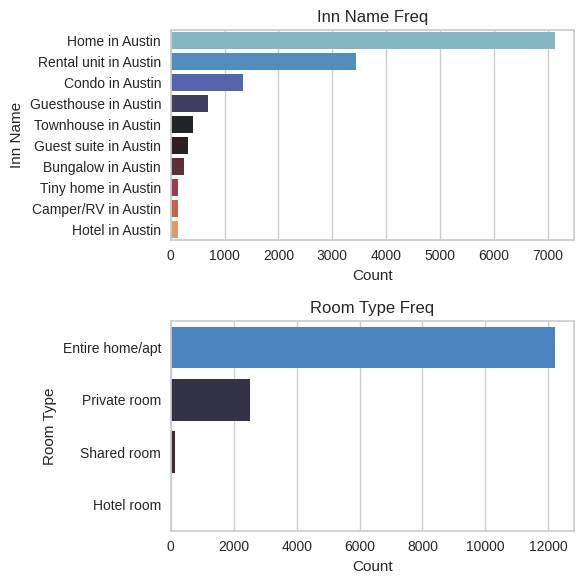

In [ ]:
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(211)
ax = sns.countplot(data=df, y='inn_name', order=df['inn_name'].value_counts().nlargest(10).index, palette='icefire')
ax.set(title='Inn Name Freq', ylabel='Inn Name', xlabel='Count')

fig.add_subplot(212)
ax=sns.countplot(data=df, y='room_type', palette='icefire')
ax.set(title='Room Type Freq', ylabel='Room Type', xlabel='Count')
plt.subplots_adjust(hspace=.5)
plt.tight_layout()
plt.show()

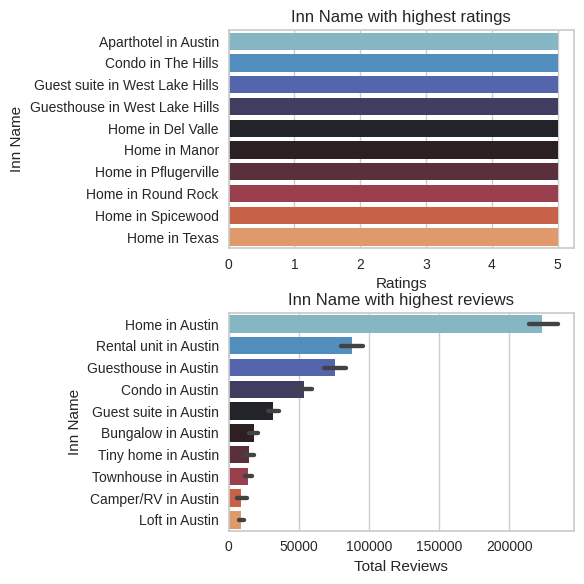

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.add_subplot(211)
ax = sns.barplot(data=df, y='inn_name', x='ratings', estimator=np.mean, palette='icefire', order=df.groupby('inn_name')['ratings'].mean().nlargest(10).index)
ax.set(title='Inn Name with highest ratings', ylabel='Inn Name', xlabel='Ratings')

fig.add_subplot(212)
ax = sns.barplot(data=df, y='inn_name', x='number_of_reviews', estimator=np.sum,order=df.groupby('inn_name')['number_of_reviews'].sum().nlargest(10).index, palette='icefire')
ax.set(title='Inn Name with highest reviews', ylabel='Inn Name', xlabel='Total Reviews')
plt.tight_layout()
plt.subplots_adjust(hspace=.3)
plt.show()

### 3.2. Checking the WordCloud for the variable "inn_name"

In [45]:
from wordcloud import WordCloud

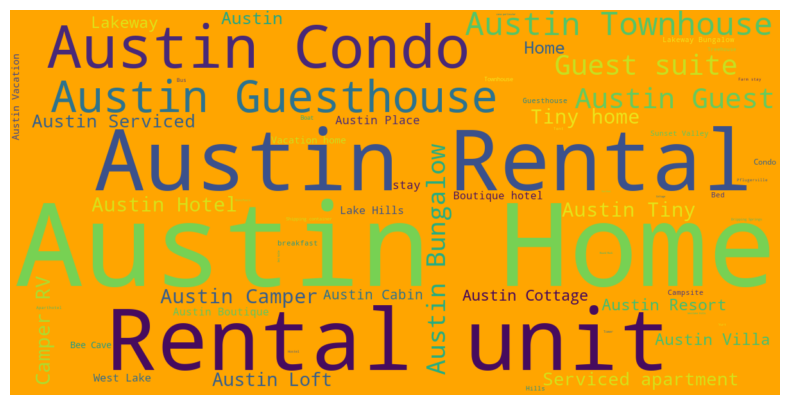

In [46]:
# "inn_name" column strings concatenation into a single string
text = '     '.join(airbnb_df['inn_name'].astype(str))

# word cloud creation
wordcloud = WordCloud(width=1200, height=600, random_state=5, max_font_size=200, background_color='orange').generate(text)

#  matplotlib view of word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('wordcloud.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


**Observation:**
   - The word cloud projects the most popular listing's 'inn_name'.
   - The dataset caters infomration about Austin, Texas and hence the word cloud here shows that listings of 'Austin Home' is more seen overall in the dataset.

### 3.3. Correlation Matrix (for all features in the dataset)

/var/folders/7v/fsnty4bx2h57n8yk8r3qrnlr0000gn/T/ipykernel_70645/2491450911.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb_df.corr()


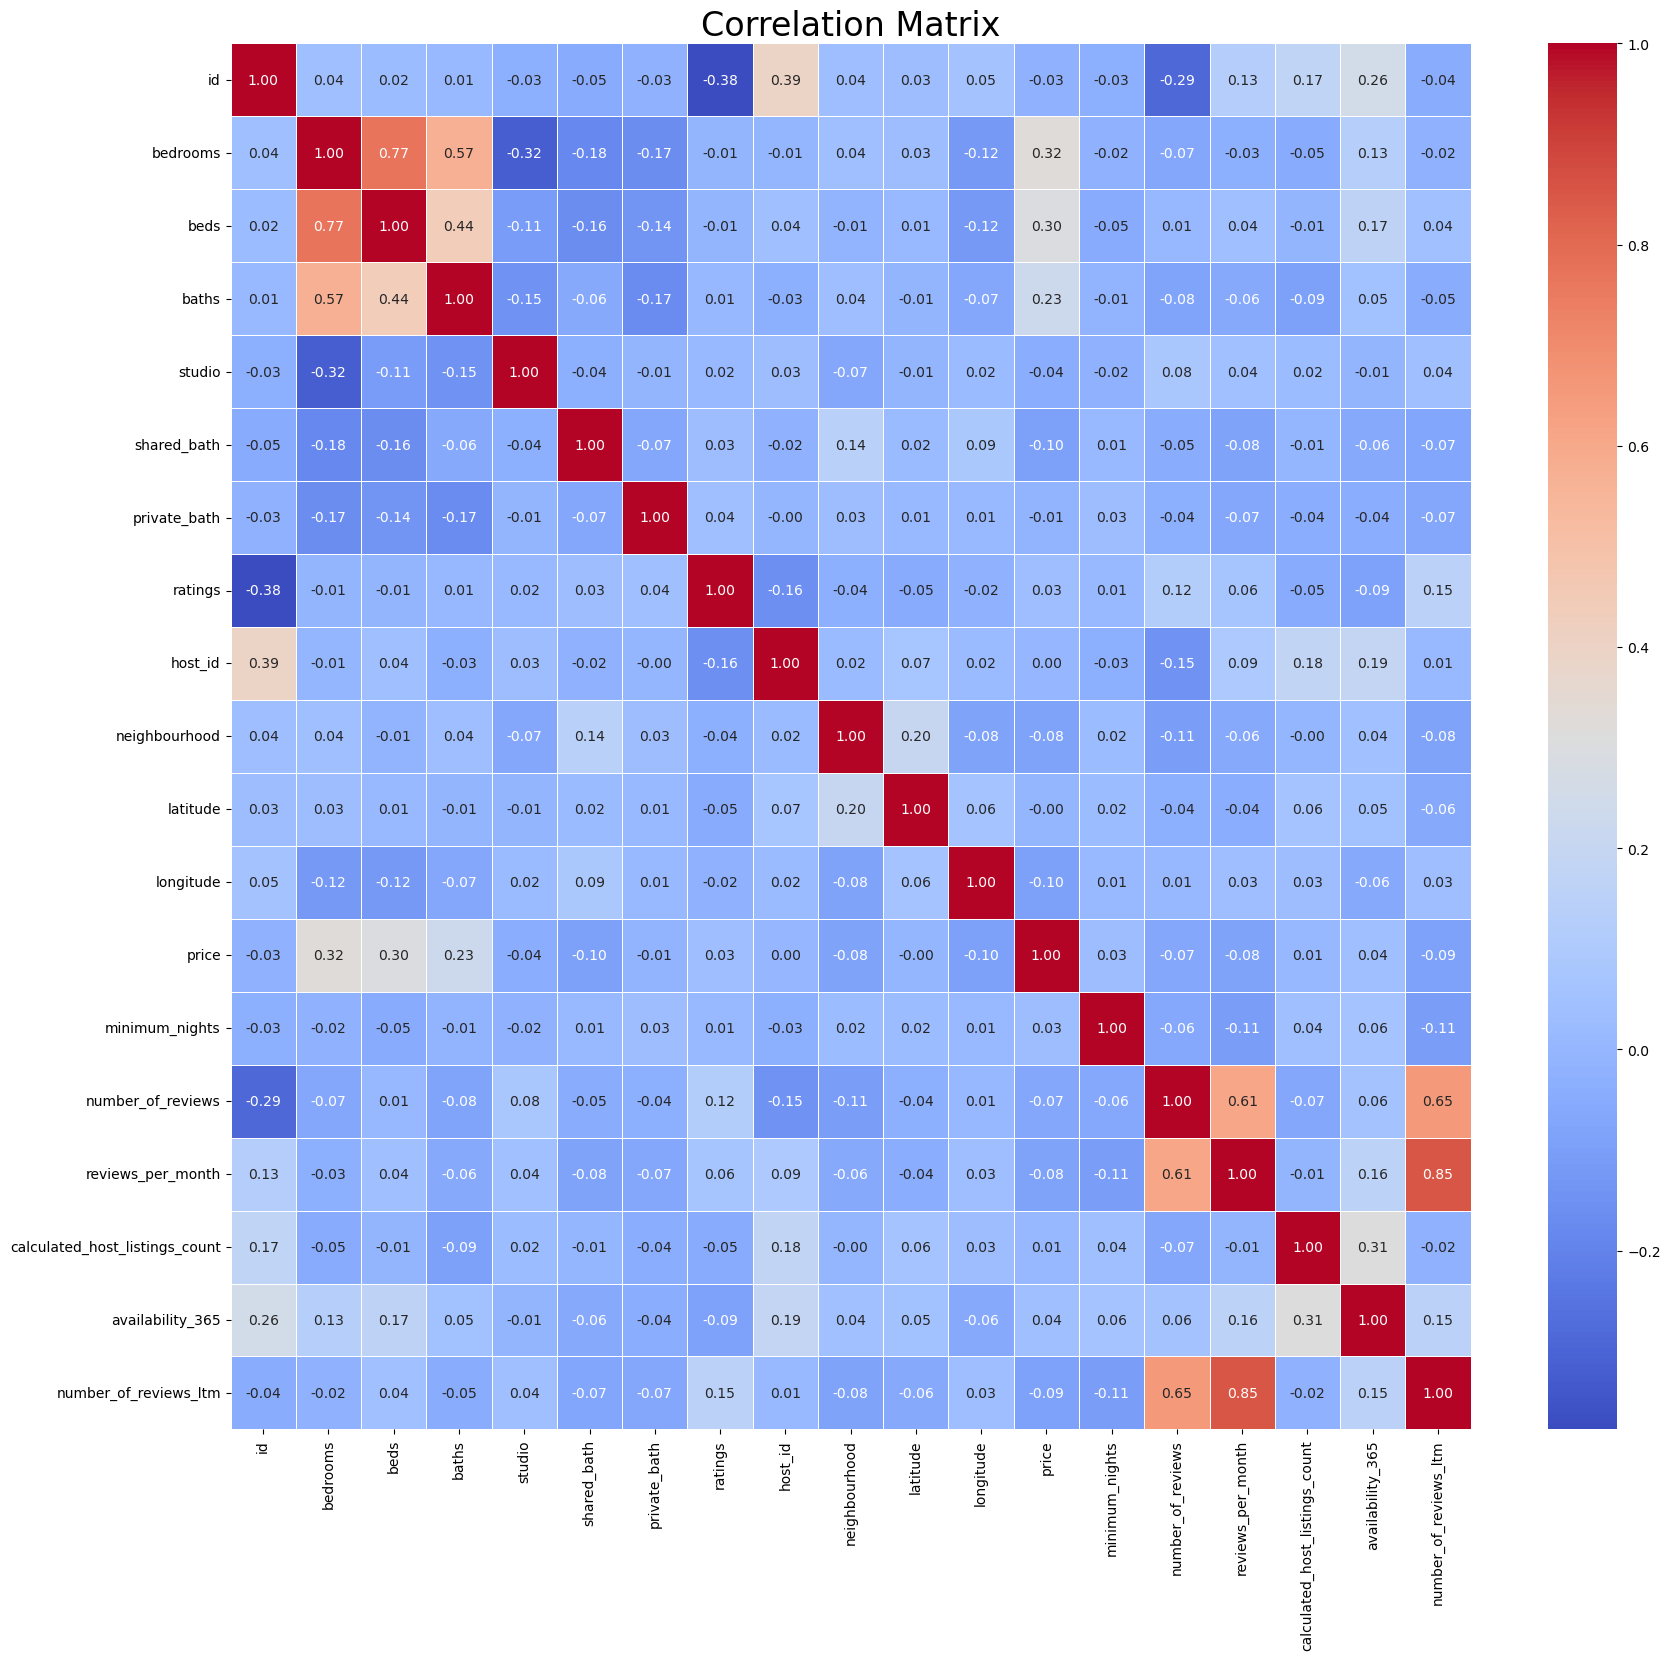

In [47]:
# Computing correlation matrix
correlation_matrix = airbnb_df.corr()

# Setting up figure
plt.figure(figsize=(20, 18))

# Creating heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=24)
plt.savefig('GlobalCorrelationMatrix.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


**Observation:**


- 'number_of_reviews_ltm' and 'reviews_per_month' , 'bedrooms' and 'beds' are the parameters that indicates a positive linear correlation
- 'host_id' and 'price' are the parameters that indicates almost no linear correlation.
- 'studio' and 'bedrooms', 'longitude' and 'availability_365' are the parameters that indicates a negative linear correlation.




    

In [48]:
airbnb_df['price'].describe()

count    14861.000000
mean       269.298769
std        549.376464
min          1.000000
25%         95.000000
50%        150.000000
75%        266.000000
max      19286.000000
Name: price, dtype: float64

### 3.4. Visualization of the correlation matrix for different price ranges

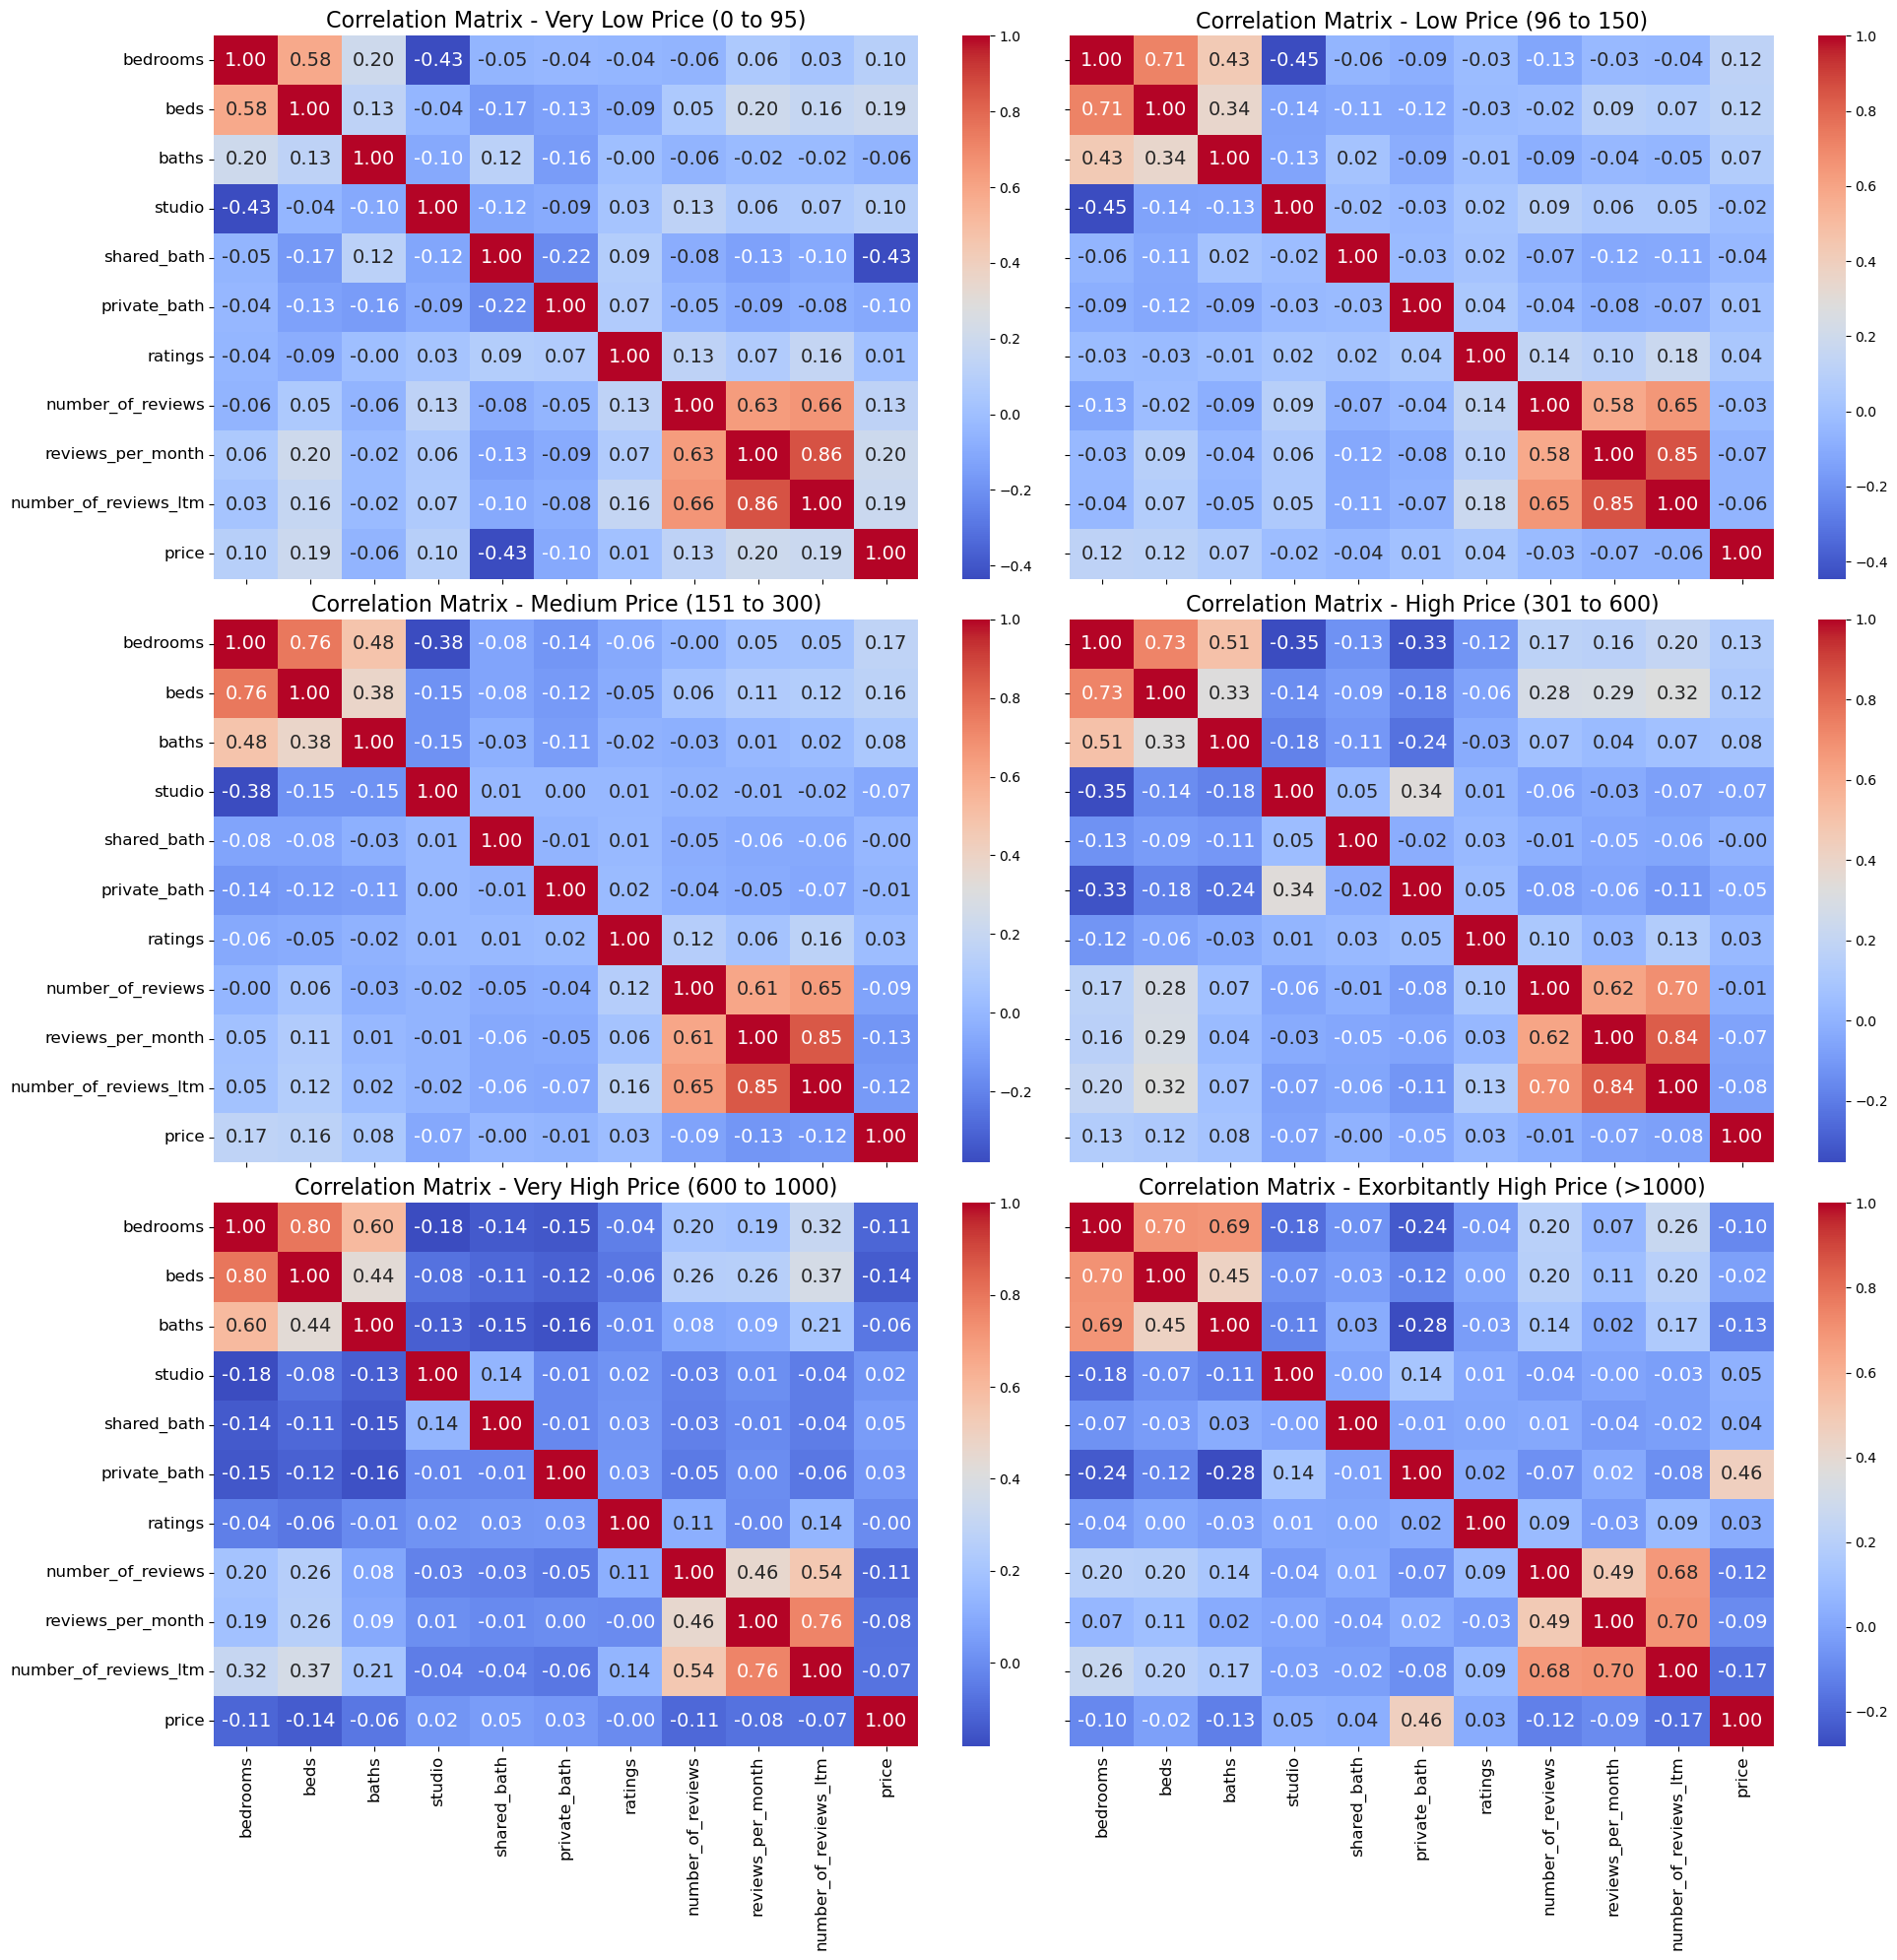

In [49]:
# Choosing the specified independent variables
selected_columns = ['bedrooms', 'beds', 'baths', 'studio', 'shared_bath', 'private_bath', 'ratings', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm', 'price']
numeric_columns = airbnb_df[selected_columns].copy()

# Categorizing the price ranges
conditions = [
    (numeric_columns['price'] <= 95),
    (numeric_columns['price'] <= 150) & (numeric_columns['price'] > 95),
    (numeric_columns['price'] <= 300) & (numeric_columns['price'] > 150),
    (numeric_columns['price'] <= 600) & (numeric_columns['price'] > 300),
    (numeric_columns['price'] <= 1000) & (numeric_columns['price'] > 600),
    (numeric_columns['price'] > 1000)
]

# Creating a label format
labels = ['Very Low Price (0 to 95)', 'Low Price (96 to 150)', 'Medium Price (151 to 300)','High Price (301 to 600)','Very High Price (600 to 1000)', 'Exorbitantly High Price (>1000)']

fig, axes = plt.subplots(3, 2, figsize=(20,20), sharex=True, sharey=True)

for i, (ax, condition, label) in enumerate(zip(axes.flatten(), conditions, labels), 1):
    subset_df = numeric_columns[condition].copy()
    correlation_matrix = subset_df.corr()

    sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
    ax.set_title(f'Correlation Matrix - {label}', fontsize=16)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.savefig('CorrelationMatrix_PriceRange.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()


**Observation:**
 - To understand the correlation between the independent variables (features) and the target variable price, the price is categorized into different ranges based on the Min, Max and Median prices
 
- Classifying as follows:
  -  Very Low Price (0 to 95) 
  -  Low Price (96 to 150)
  -  Medium Price (151 to 300)
  -  High Price (301 to 600)
  -  Very High Price (600 to 1000)
  -  Exorbitantly High Price (>1000)
  
- The correlation matrix is plotted using the sns heatmap for each price category as defined above to understand how each parameter correlates with each other. 

- The matrix also reveals that the target variable price is not dependent only on one feature but rather multiple features dictates the price of the listing. This leads us to perform regression techniques.

- **Positive correlation:** We can infer that the positive correlation features are bedrooms, baths, beds, number_of_reviews, reviews_per_month, number_of_reviews_ltm for each of the price category between each other. For exorbitantly high price category there is another positive correlating feature 'private_bath' which indicates the customers also prioritize this feature when looking for very high end listings. The intensity of red indicates such correlation.

- **Negative correlation:** We can infer that the negative correlation features studio, shared_bath, private_bath  with respect to bedrooms, beds, baths. The intensity of blue indicates such correlation.

- **No correlation:** We can also observe there are multiple loosely correlated variables which is indicated by  neutral colors.


### 3.5. Box Plot for 3 variables with respect to ratings

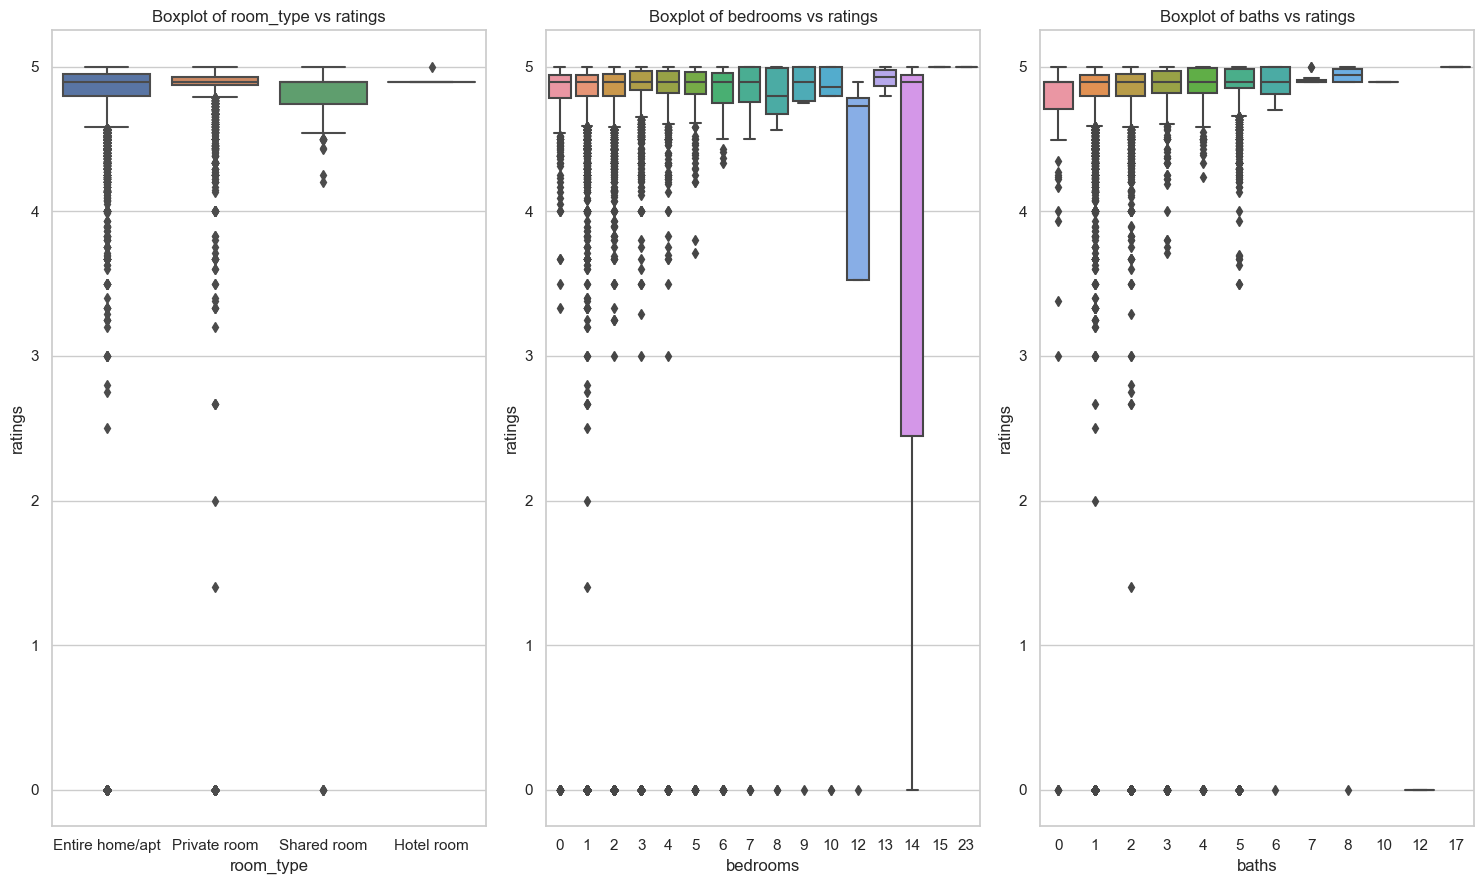

In [50]:
factors = ['room_type', 'bedrooms', 'baths']

# Setting the plot the style
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 9))

# Visiting the factors and creating boxplots
for i, factor in enumerate(factors):
    sns.boxplot(x=factor, y='ratings', data=airbnb_df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {factor} vs ratings')

# Adjusting layout
plt.tight_layout()
plt.savefig('BoxPlot_Ratings.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()


**Observation:**
 - The above box plots show the features combinations such as room_type vs ratings, bedrooms vs ratings, baths vs ratings.
 - Room_type vs Ratings
     - We can see ratings are higher for Entire home/apt room_type and least for Hotel room room_type.
     - We can also observe that the minimum rating for private room is the highest while for shared room is the lowest. However the ratings > 4.2 for all the room_type categories along with considerable amount of outliers.
 
 - Bedrooms vs Ratings
     - With respect to number of bedrooms we could infer that there are more listings with less than 4 bedroooms.
     - We can also observe, there exisits significant amount of listings with 0 bedrooms and with ratings denoting it could be studio listing.
     - 12 and 14 count Bedrooms have the least rating.
 
 - Baths vs Ratings
     - We can infer that the minimum rating is greater than 4.5 for all the count of baths ranging from 0 to 8 
     - Listings with bath count  > 8 are minimal which could also be outliers.

### 3.6. Geographical distribution of listings

In [2]:
# pip install folium

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import seaborn as sns

df = pd.read_csv('airbnb_dataset.csv')
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

for i in range(len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

m.save('Geo_map.html')

### 3.7. Relationship between Ratings and Price

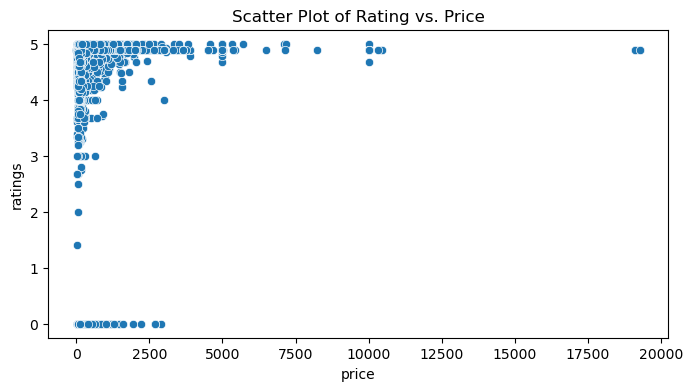

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_dataset.csv')
plt.figure(figsize=(8, 4))
sns.scatterplot(x='price', y='ratings', data=df)
plt.title('Scatter Plot of Rating vs. Price')
plt.xlabel('price')
plt.ylabel('ratings')
plt.show()

# 4. Machine Learning Models

## 4.1. Linear Regression Implementation

Top 3 Most Positive Coefficients:
bedrooms    0.324741
beds        0.297455
baths       0.228842
Name: price, dtype: float64

Top 3 Most Negative Coefficients:
longitude               -0.096424
shared_bath             -0.095529
number_of_reviews_ltm   -0.088686
Name: price, dtype: float64
Mean Squared Error: 395718.3868381975

R-squared: 0.11373399778099491


/var/folders/7v/fsnty4bx2h57n8yk8r3qrnlr0000gn/T/ipykernel_78338/4199231071.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


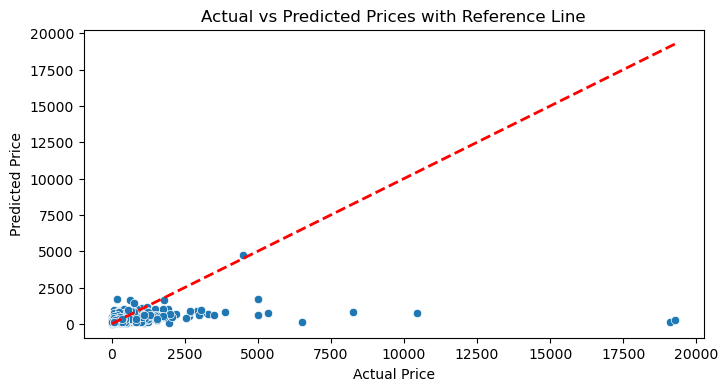

In [4]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('airbnb_dataset.csv')

correlation_matrix = df.corr(method='pearson')

top_pos_corr = correlation_matrix['price'].sort_values(ascending=False)[1:4].index
top_neg_corr = correlation_matrix['price'].sort_values()[0:3].index

print("Top 3 Most Positive Coefficients:")
print(correlation_matrix['price'].sort_values(ascending=False)[1:4])
print("\nTop 3 Most Negative Coefficients:")
print(correlation_matrix['price'].sort_values()[0:3])

selected_variables = list(top_pos_corr)

X = df[selected_variables]
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the R-squared value
r_squared = model.score(X, Y)
print(f"\nR-squared: {r_squared}")

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2) 
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices with Reference Line')
plt.show()


## 4.2. Linear angle regression

In [126]:
from sklearn.linear_model import Lars
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

p = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = p.drop('price', axis=1)  # Features
y = p['price']  # Target variable
le = LabelEncoder()1
airbnb['neighbourhood'] = le.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = le.fit_transform(airbnb['room_type'])
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for LARS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LARS model
lars_model = Lars(n_nonzero_coefs=len(X.columns))  # The parameter 'n_nonzero_coefs' controls the number of features to select

# Fit the model to the training data
lars_model.fit(X_train_scaled, y_train)

# selected features and their coefficients printing
selected_features = X.columns[lars_model.coef_ != 0]
coefficients = lars_model.coef_[lars_model.coef_ != 0]

# Combine features and coefficients into a DataFrame for sorting
result_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': coefficients})

# Sort the DataFrame by Coefficient in descending order
result_df = result_df.sort_values(by='Coefficient', ascending=False)

# Printing sorted features and their coefficients
print(result_df)


                           Feature  Coefficient
1                         bedrooms   117.516920
2                             beds    51.078634
3                            baths    35.079282
4                           studio    25.022651
12                  minimum_nights    22.982223
14               reviews_per_month    21.867057
6                     private_bath    20.296762
7                          ratings    18.175281
15  calculated_host_listings_count    10.809345
16                availability_365     1.829145
8                          host_id     0.930824
10                        latitude     0.306767
13               number_of_reviews   -10.057813
5                      shared_bath   -12.059166
0                               id   -19.474838
11                       longitude   -28.580928
9                    neighbourhood   -44.832622
17           number_of_reviews_ltm   -61.976535


Mean Squared Error (MSE): 392796.3292527919
R-squared (R2): 0.10512663566757319


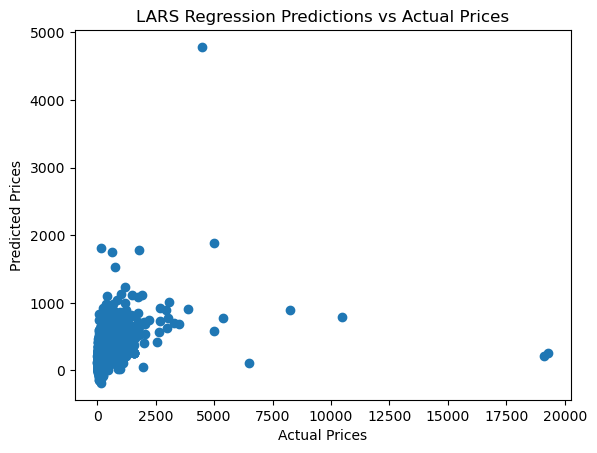

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

features_selected = airbnb[['bedrooms', 'beds', 'baths', 'studio', 'minimum_nights',
                             'availability_365', 'reviews_per_month', 'private_bath', 'ratings','latitude', 'calculated_host_listings_count']]
target = airbnb['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LARS regression model
lars_model = Lars(n_nonzero_coefs=len(features_selected.columns)) 
lars_model.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = lars_model.coef_

# Predictions on the test set
predict = lars_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predict)
r2_square_score = r2_score(y_test, predict)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2_square_score}')

# Visualize predictions vs actual prices
plt.scatter(y_test, predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('LARS Regression Predictions vs Actual Prices')
plt.show()


## 4.3. Lasso Regression

##### Packages import

In [57]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

### 4.3.1. Analysing the Feature Importance from Lasso Regression based on their dependency on the target variable 'price':

Selected Features:
id                                -14.849910
bedrooms                          118.134001
beds                               50.875092
baths                              35.370224
studio                             24.736938
shared_bath                       -11.538651
private_bath                       20.554773
ratings                            18.593863
host_id                             2.282098
neighbourhood                     -48.216998
latitude                            2.241901
longitude                         -28.410764
minimum_nights                     22.696492
number_of_reviews                  -6.197140
calculated_host_listings_count      9.718396
availability_365                    2.260251
number_of_reviews_ltm             -46.023053
dtype: float64


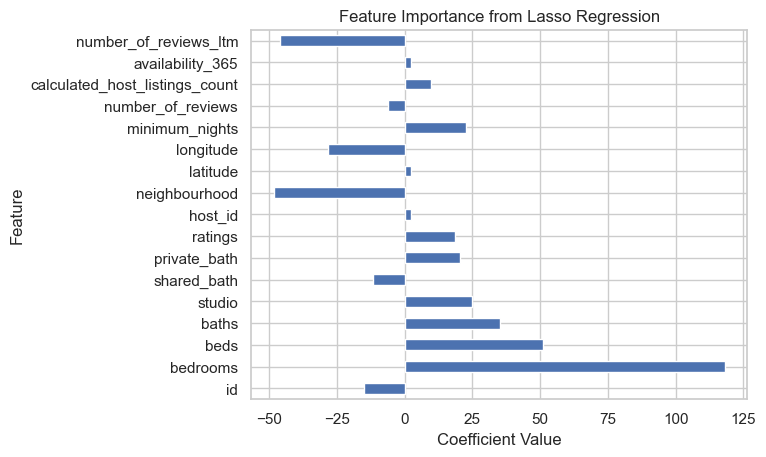

In [52]:
X = airbnb_df[['id', 'bedrooms', 'beds', 'baths', 'studio', 'shared_bath',
       'private_bath', 'ratings', 'host_id',  'neighbourhood',
       'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews',  'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
y = airbnb_df['price']

# Splitting the dataset ---> training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Lasso regression model
alpha = 1.5
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Getting feature importance from coefficients
feature_importance = pd.Series(lasso_model.coef_, index=X.columns)

# Displaying the non-zero coefficients
selected_features = feature_importance[feature_importance != 0]
print("Selected Features:")
print(selected_features)

# Visualizing feature importance
selected_features.plot(kind='barh')
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.savefig('feature_lasso.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


**Observation:**

The above plot shows the correlation between the price and other features from the dataset which is represented in terms of cofficient values using lasso regression model.

- A positive coefficient denotes, as the corresponding feature increases, the target variable 'price' is expected to increase.  From the above plot the first 4 ranked feature variables with a positive cofficient are as follows 'bedrooms', 'beds', 'baths', 'studio'.

- A negative coefficient denotes, as the corresponding feature increases, the target variable 'price' is expected to decrease. From the above plot the least ranked feature variable with a negative ccofficient is 'number_of_reviews_ltm'


- The magnitude of the coefficient indicates the strength of the relationship between the feature and the target variable 'price'. Larger magnitude coefficients suggest a stronger influence on the prediction.

- The feature with coefficient value = 0 will be automatically excluded by Lasso Regression model. 

**Hence, it is evident that the feature 'bedrooms' is the top feature variable with highest coefficient value of 120.1838 and will be considered in the following regression analysis.**

### 4.3.2. Lasso Regression (Training and Testing the dataset)

Training Mean Squared Error: 227228.33715853773
Test Mean Squared Error: 386538.69700010115


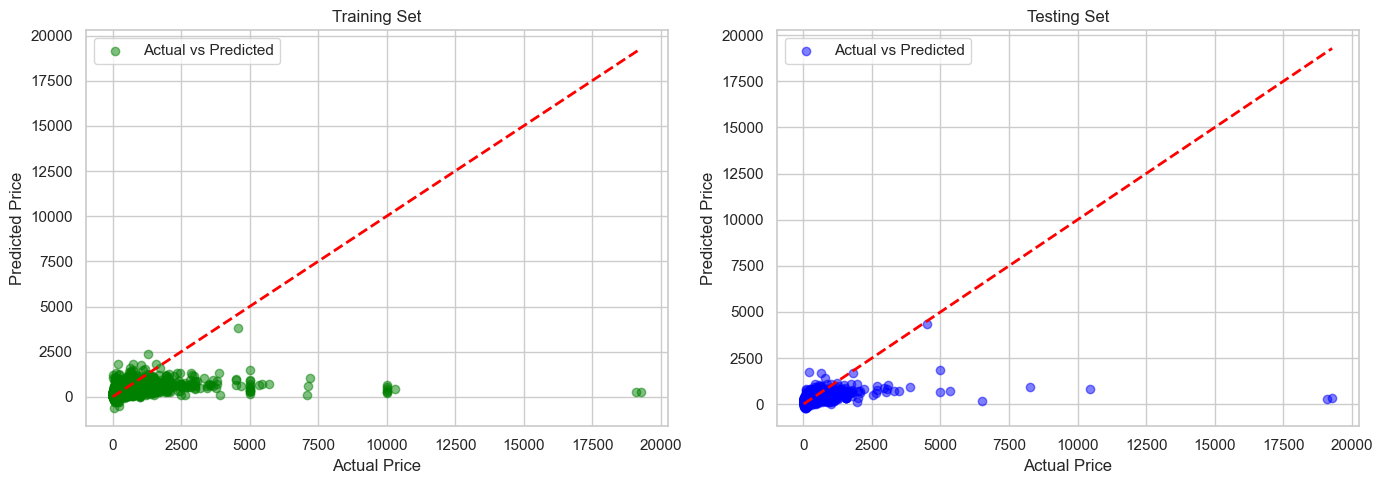

In [53]:
df_subset = airbnb_df[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath', 'price']]

# Dropping rows with missing values
df_subset = df_subset.dropna()

# Splitting the dataset into training and testing sets
X = df_subset[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath']]
y = df_subset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Lasso regression model
alpha = 1.5
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Making predictions on the training set
y_train_pred = lasso_model.predict(X_train_scaled)

# Making predictions on the test set
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluating the model on both sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Training Mean Squared Error: {mse_train}')
print(f'Test Mean Squared Error: {mse_test}')

# Visualizing the results 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting
# For training set
axes[0].scatter(y_train, y_train_pred, color='green', label='Actual vs Predicted', alpha=0.5)
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].legend()
axes[0].set_title('Training Set')

# For testing set
axes[1].scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].legend()
axes[1].set_title('Testing Set')

plt.tight_layout()
plt.savefig('lasso_train_test.png', format='png', dpi=800, bbox_inches='tight')
plt.show()


**Observation:**
   - Displaying the model after applying the lasso regression.
   - It shows the data points lying on the lasso regression line for alpha = 1.5
   - Also , we can observe how the data points are scattered in the training and test datasets.
   - The Mean Squared Error for Training dataset < Testing datasets which implies Lasso introduces more error which could be due to over simplifying the model by nullifying the independent variables.
   - There are outliers in the dataset which is not handled well by Lasso regression.

    

### 4.3.3. Lasso Regression for variables with Positive coefficients values

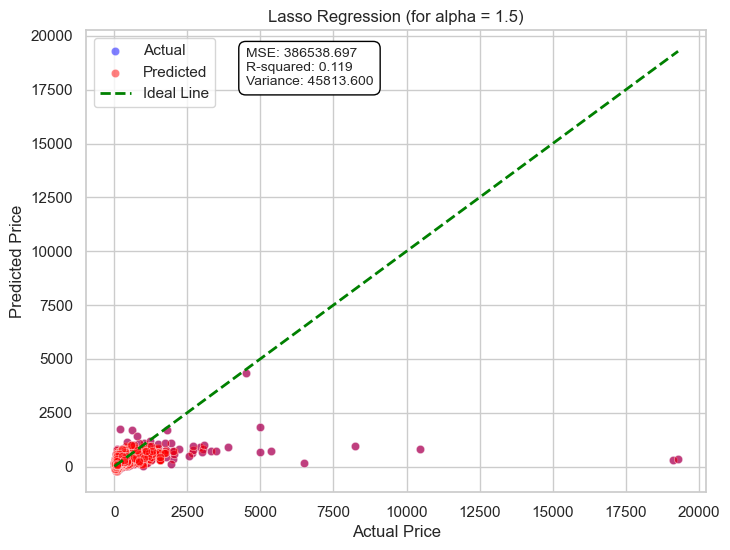

In [54]:


# Selectting relevant columns
df_subset = airbnb_df[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath', 'price']]

# Dropping rows with missing values
df_subset = df_subset.dropna()

# Splitting the dataset into train & test sets
X = df_subset[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath']]
y = df_subset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting alpha value
alpha = 1.5

# Training the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_test_pred = lasso_model.predict(X_test_scaled)

# Calculating evaluation metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
variance_test = np.var(y_test_pred)

# Plotting: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', label='Actual', alpha=0.5)
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Predicted', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2, label='Ideal Line')


text_annotation = f'MSE: {mse_test:.3f}\nR-squared: {r2_test:.3f}\nVariance: {variance_test:.3f}'

plt.text(4500.05, 18500.5, text_annotation, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title(f'Lasso Regression (for alpha = {alpha})')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.savefig('lasso_regression_positive_coefficient.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


### 4.3.4. Lasso Regression for variables with Negative coefficients values

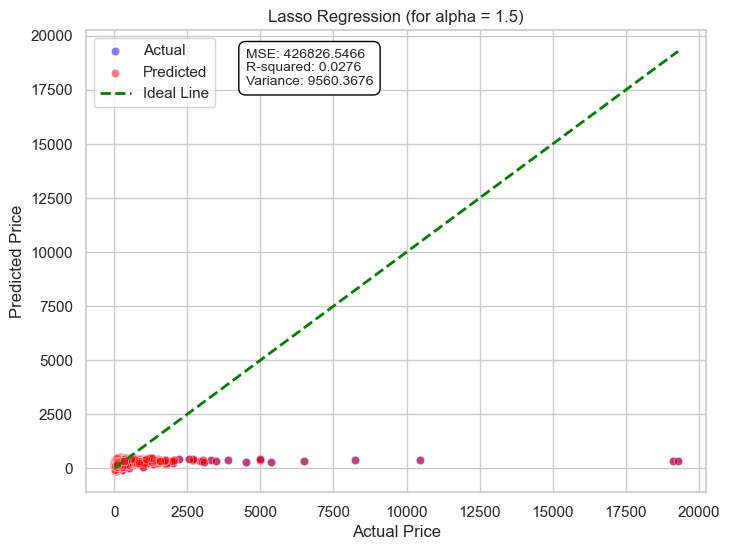

In [55]:
df_subset = airbnb_df[['number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath', 'price']]

# Dropping rows with missing values
df_subset = df_subset.dropna()

# Splitting the dataset into training and testing sets
X = df_subset[['number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath']]
y = df_subset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting the alpha value
alpha = 1.5

# Training the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

y_test_pred = lasso_model.predict(X_test_scaled)

# Calculating evaluation metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
variance_test = np.var(y_test_pred)

# Plotting: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', label='Actual', alpha=0.5)
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Predicted', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2, label='Ideal Line')

text_annotation = f'MSE: {mse_test:.4f}\nR-squared: {r2_test:.4f}\nVariance: {variance_test:.4f}'

plt.text(4500.05, 18500.5, text_annotation, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title(f'Lasso Regression (for alpha = {alpha})')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.savefig('lasso_regression_negative_coefficient.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


### 4.3.5. Comparison of various alpha values for the Lasso Regression Model 

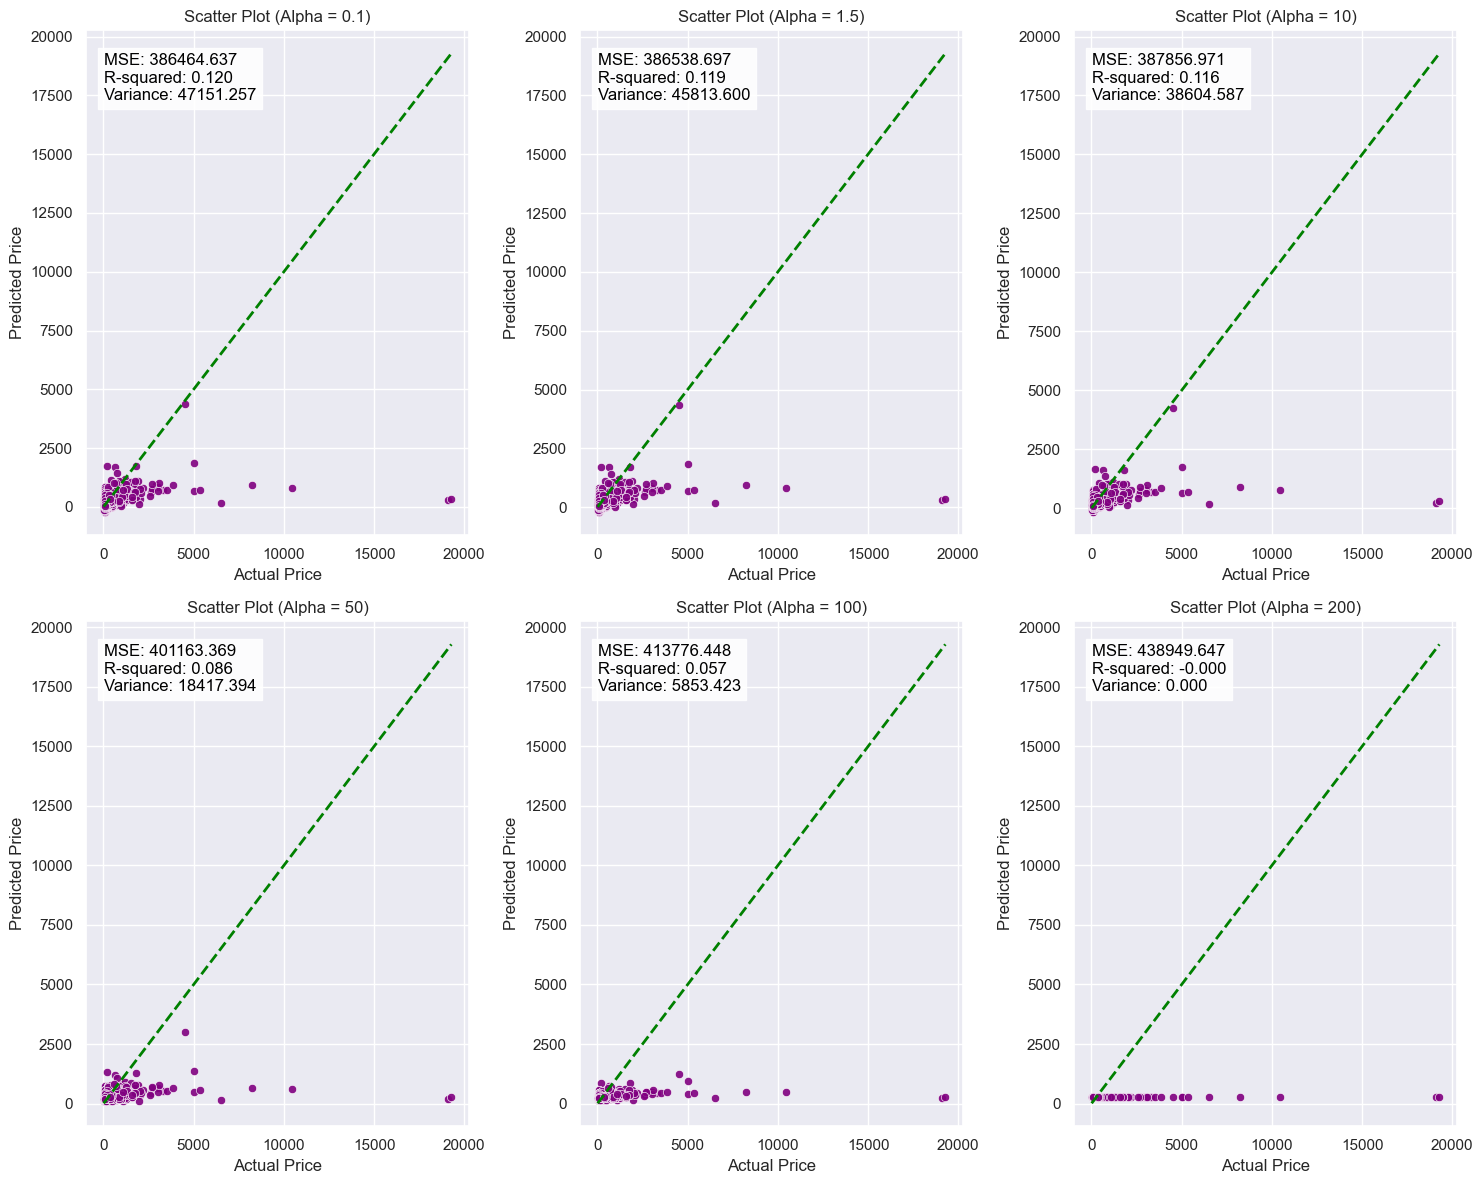

In [56]:
# Selecting relevant columns
df_subset = airbnb_df[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath', 'price']]

# Dropping rows with missing values
df_subset = df_subset.dropna()

# Splitting the dataset into training and testing sets
X = df_subset[['bedrooms', 'beds', 'baths', 'studio', 'private_bath', 'ratings', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'longitude', 'neighbourhood', 'shared_bath']]
y = df_subset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualizing for different alpha values
alpha_values = [0.1, 1.5, 10, 50, 100, 200]

sns.set(style="darkgrid")

# Plotting: Scatter plots
plt.figure(figsize=(15, 12))
for i, alpha in enumerate(alpha_values, 1):
    
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)

    y_test_pred = lasso_model.predict(X_test_scaled)

    # Metrics Calculation
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    variance_test = np.var(y_test_pred)

    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_test_pred, color='purple', alpha=0.9)  # Specify x and y explicitly
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2)
    
  
    plt.text(min(y_test), max(y_test), f'MSE: {mse_test:.3f}\nR-squared: {r2_test:.3f}\nVariance: {variance_test:.3f}',
             verticalalignment='top', horizontalalignment='left', color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.9))
    
    plt.title(f'Scatter Plot (Alpha = {alpha})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

plt.tight_layout()
plt.savefig('lasso_regression_alpha.png', format='png', dpi=500, bbox_inches='tight')
plt.show()


**Observation:**
   - The above plots shows the impact of different alpha values (regularization parameter) which controls the regularization penalty.
   - It can be observed that as we increase the alpha value, the Lasso regression overshrinks the model indicating that the target variable (price) becomes almost insensitive to independent variables (features).
   - It can also be observed that the variance reduces significantly as the regularization parameter increases. However, we should not choose an alpha value based solely on the lowest variance, as this could lead to inaccurate model. 
   - Hence, Alpha= 1.5 seems to be an ideal value in this case based on the above results. 

## 4.4. DataPrep Eda Display (using specific package import)

#### Showing Plot Correlation, Plot Missing and Pycaret Regression Module 

In [ ]:
from dataprep.eda import plot, plot_correlation, plot_missing


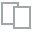
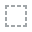
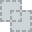
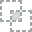
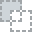
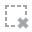
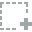
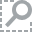
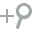
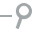
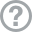
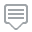
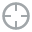
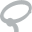
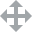
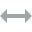
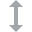
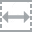
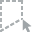
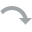
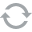
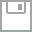
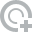
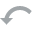
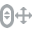
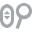
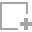
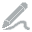
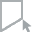
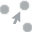
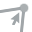
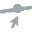

In [ ]:
plot_missing(df)


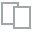
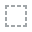
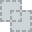
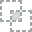
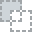
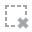
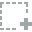
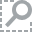
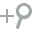
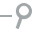
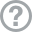
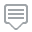
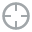
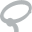
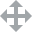
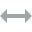
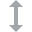
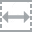
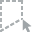
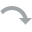
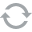
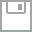
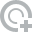
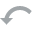
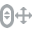
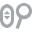
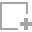
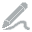
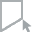
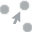
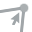
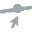

In [ ]:
plot_correlation(df)

**Regression Using Pycaret**

In [ ]:
data = df[['bedrooms', 'beds', 'baths', 'studio', 'shared_bath', 'private_bath', 'room_type', 'minimum_nights', 'price']].copy()

data['room_type'] = data['room_type'].astype('category')

In [ ]:
data['room_type'].cat.categories

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object')

In [ ]:
data['room_type'] = data['room_type'].cat.codesa

<Axes: >

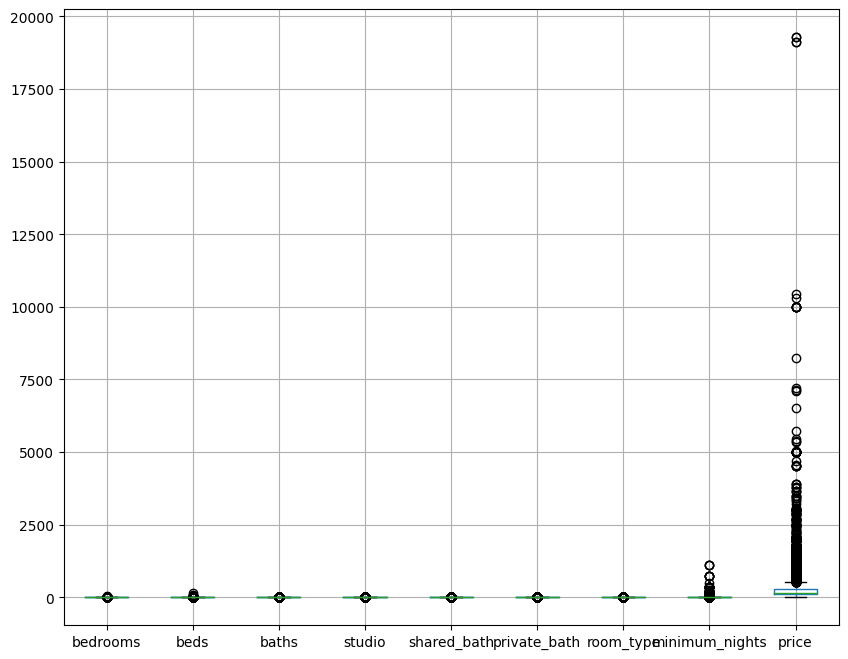

In [ ]:
data.boxplot(figsize=(10,8))

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.4 M

In [ ]:
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


## 4.5. Gradient Boosting Regressor

In [ ]:
from pycaret.regression import *

s = setup(data=data, target='price', session_id=123, remove_outliers=True)

In [ ]:
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
tuned = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
result = predict_model(tuned, data=data)

In [ ]:
result.head()

bedrooms  beds  baths  studio  shared_bath  private_bath  room_type  \
0         1     2      1       0            0             0          0   
1         1     1      1       0            1             0          2   
2         0     1      1       1            0             0          0   
3         1     2      1       0            0             0          0   
4         1     1      1       0            0             0          0   

   minimum_nights  price  prediction_label  
0               2    126        187.804407  
1               1     45        130.096884  
2              30     57        164.948556  
3               3    159        205.033300  
4               4     48        187.795415

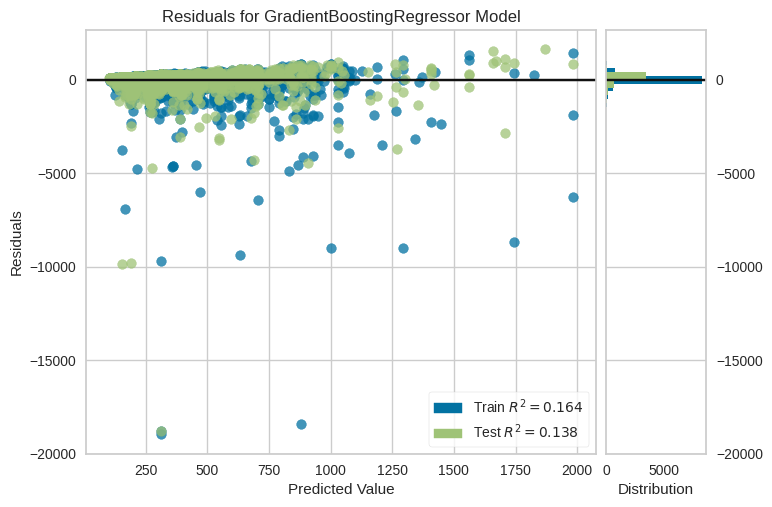

In [ ]:
plot_model(tuned)

In [ ]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 4.6. Decision Tree Regression Implementation

bedrooms: 0.13364672794057053
beds: 0.03379596341822028
baths: 0.046298993297157746
studio: 0.028336884474849732
shared_bath: 0.0009416461915709795
private_bath: 0.008983545697331511
host_id: 0.03309903436127577
neighbourhood: 0.07462784129306588
latitude: 0.19680966018127496
longitude: 0.1154175718406153
minimum_nights: 0.06729104498614195
number_of_reviews: 0.035514004435046057
reviews_per_month: 0.07216732555090062
calculated_host_listings_count: 0.047006212808734495
availability_365: 0.0907631262471562
number_of_reviews_ltm: 0.015300417276088076
top_features: ['latitude', 'bedrooms', 'longitude', 'availability_365', 'neighbourhood']

Performance Metrics for Decision Tree Regression Model:
MSE: 281190.70836768777
R-squared: 0.3593879156287394


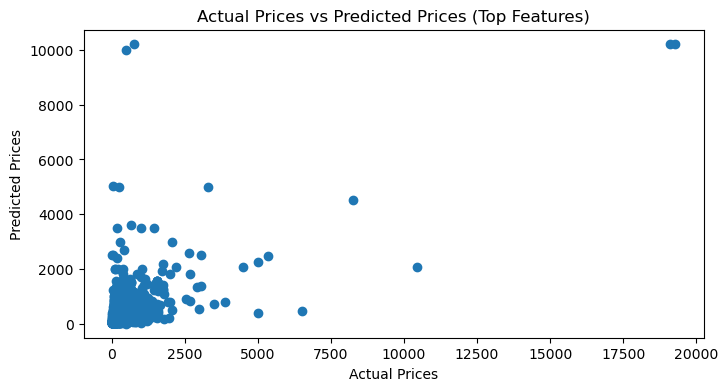

In [5]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

airbnb = pd.read_csv('airbnb_dataset.csv')
airbnb = airbnb.dropna(subset=['price'])

features = ['bedrooms', 'beds', 'baths', 'studio', 'shared_bath', 'private_bath', 'host_id',
            'neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

target = 'price'

X_train, X_test, y_train, y_test = train_test_split(airbnb[features], airbnb[target], test_size=0.2, random_state=42)

# Fit the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Get feature importance directly from the model
feature_importance = regressor.feature_importances_

# Create a list to store feature names and their importance values
feature_importance_list = []

for feature, importance in zip(features, feature_importance):
    feature_importance_list.append((feature, importance))
    print(f"{feature}: {importance}")

# Sort feature importance in descending order
feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Select the top 5 features
top_features = [feature for feature, _ in feature_importance_list[:5]]

print ("top_features:", top_features )

# Use only the top features for predictions
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Fit a new decision tree regressor using only the top features
regressor_top = DecisionTreeRegressor(random_state=42)
regressor_top.fit(X_train_top, y_train)

# Predictions on the test set using the top features
y_pred_top = regressor_top.predict(X_test_top)

# Calculate Mean Squared Error (MSE) and R-squared for the top features
mse_top = mean_squared_error(y_test, y_pred_top)
r2_top = r2_score(y_test, y_pred_top)

# Display performance metrics for the top features
print("\nPerformance Metrics for Decision Tree Regression Model:")
print(f"MSE: {mse_top}")
print(f"R-squared: {r2_top}")

# Plot the predicted vs actual prices for the top features
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_top)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Top Features)')
plt.show()


## 4.7. Random forest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming 'airbnb' is the DataFrame containing the dataset
features = airbnb[['bedrooms', 'beds', 'baths', 'studio', 'minimum_nights',
                   'availability_365', 'reviews_per_month', 'private_bath', 'ratings', 'calculated_host_listings_count',
                   'room_type', 'neighbourhood','id','longitude','number_of_reviews_ltm','host_id','shared_bath']]
target = airbnb['price']

# Encode categorical variables
le = LabelEncoder()
features['room_type'] = le.fit_transform(features['room_type'])
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])

# Assuming 'model' is a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
model.fit(features, target)

# Access the feature importances
feature_importances = model.feature_importances_

# Map feature names to importance values
feature_names = features.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


C:\Users\sanap\AppData\Local\Temp\ipykernel_31080\548237534.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['room_type'] = le.fit_transform(features['room_type'])
C:\Users\sanap\AppData\Local\Temp\ipykernel_31080\548237534.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['neighbourhood'] = le.fit_transform(features['neighbourhood'])


longitude: 0.21571708220342284
id: 0.15294031958668086
bedrooms: 0.12979357039136508
calculated_host_listings_count: 0.07157797650044957
availability_365: 0.06037511525141605
host_id: 0.058386859134325286
neighbourhood: 0.052685698108442036
minimum_nights: 0.05219881708991008
reviews_per_month: 0.04491298924665939
baths: 0.03934123602477709
beds: 0.035935715661363755
private_bath: 0.02462150892833318
ratings: 0.022654003389163724
number_of_reviews_ltm: 0.021113900905045967
room_type: 0.013483602414516883
studio: 0.0037847333181162215
shared_bath: 0.00047687184601208826


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


Mean Squared Error (MSE): 217710.29048709178
R-squared (R2): 0.5040097740511433


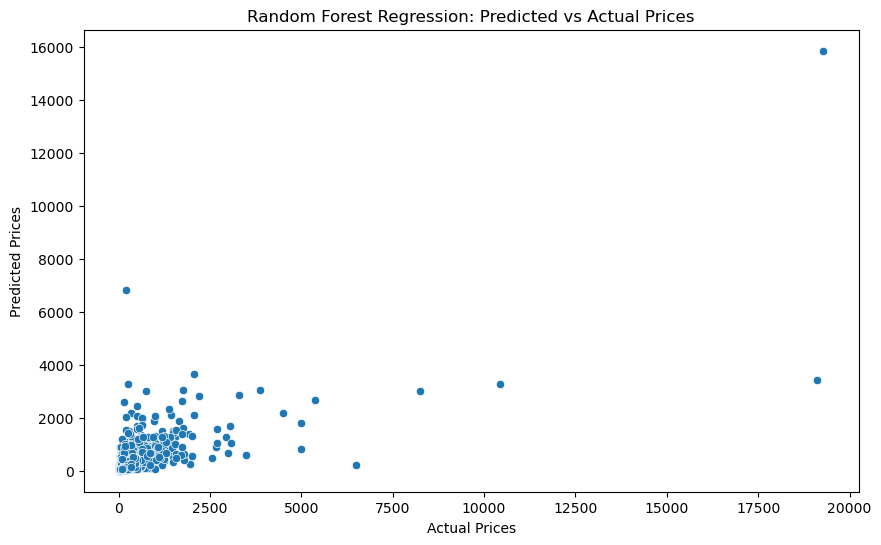

In [18]:

le = LabelEncoder()
airbnb['neighbourhood'] = le.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = le.fit_transform(airbnb['room_type'])
features_selected = airbnb[['longitude','id', 'bedrooms','calculated_host_listings_count','availability_365',
                            'host_id','neighbourhood','minimum_nights','reviews_per_month']]
target = airbnb['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

#Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions on the test set
predict = model.predict(X_test)

#Estimate the model
mse = mean_squared_error(y_test, predict)
r2_square_score = r2_score(y_test, predict)

#Calculations
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2_square_score}')


# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regression: Predicted vs Actual Prices')
plt.show()

# 5. Recommendations

## 5.1. Clustering 

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
airbnb = pd.read_csv('airbnb_dataset.csv')


### For no_of_clusters(K)=3

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = features.drop('price', axis=1)  # Features
y = airbnb['price']  # Target variable
le = LabelEncoder()
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])
features['room_type'] = le.fit_transform(features['room_type'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Get feature importance from K-means clustering
feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(feature_importance)
# Sort features based on their importance
top_features = feature_importance.abs().mean(axis=0).sort_values(ascending=False).index

# Print the top features

print("Top 7 Features for Clustering:")
print(top_features[:7])

C:\Users\sanap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         id  bedrooms      beds     baths    studio  shared_bath  \
0 -0.155638 -0.664983 -0.579453 -0.323262 -0.110090     1.356660   
1  0.086319  0.211655  0.152041  0.132465 -0.023284    -0.277842   
2 -0.239345 -0.257973 -0.067184 -0.269307  0.241081    -0.222849   

   private_bath   ratings   host_id  neighbourhood  latitude  longitude  \
0      1.180665  0.024181 -0.078027       0.330856  0.035842   0.179743   
1     -0.239443 -0.060075  0.033638      -0.025544  0.021210  -0.059272   
2     -0.205400  0.264241 -0.073102      -0.259754 -0.144806   0.079764   

   room_type     price  minimum_nights  number_of_reviews  reviews_per_month  \
0   2.134969 -0.269282        0.043485          -0.274660          -0.391465   
1  -0.430599  0.106846        0.030879          -0.247874          -0.269375   
2  -0.383002 -0.207313       -0.200723           1.524899           1.765101   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                       -0.1

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airbnb['room_type'] = label_encoder.fit_transform(airbnb['room_type'])
numeric_columns = airbnb.select_dtypes(include='number')


In [21]:
# Function to get top N recommendations within the dataset for a given listing
def get_top_recommendations(input_listing_id, N=5):
    # Features for recommendations within the dataset
    features_recom = airbnb[['room_type','number_of_reviews_ltm', 'reviews_per_month',
       'number_of_reviews', 'shared_bath', 'private_bath', 'bedrooms']]
    
    # Filter out the input listing
    features_recom = features_recom[features_recom.index != input_listing_id]
    
    # cosine similarity matrix within the dataset
    cosine_similarity_matrix = cosine_similarity(features_recom)
    
    # index of the input listing
    input_listing_index = airbnb.index[airbnb['id'] == input_listing_id].values[0]
    
    # Sort indices based on similarity scores (higher similarity first)
    similar_listings_indices = cosine_similarity_matrix[input_listing_index].argsort()[::-1][:N+1]
    
    # Extract valid listing IDs and similarity scores
    top_recommendations_with_ids = [
        (airbnb.iloc[idx]['id'], cosine_similarity_matrix[input_listing_index, idx])
        for idx in similar_listings_indices
    ]
    
    # Exclude the input listing ID from recommendations
    top_recommendations_with_ids = [(listing_id, score) for listing_id, score in top_recommendations_with_ids if listing_id != input_listing_id]
    
    return top_recommendations_with_ids[:N]

# Example: Get top 5 recommendations for a given listing ID
input_listing_id = 47572  # Replace with your desired listing ID
top_recommendations = get_top_recommendations(input_listing_id, N=5)
print(f"Top 5 Recommendations for Listing ID {input_listing_id}:", top_recommendations)


Top 5 Recommendations for Listing ID 47572: [(977906.0, 0.9992572200261909), (31462834.0, 0.9992564438612801), (19966750.0, 0.998838030343894), (42339321.0, 0.9987204700089595), (6.54e+17, 0.9979027454776174)]


In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_standardized, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")


Silhouette Score: 0.16506080909986215
Davies-Bouldin Index: 2.1157361630376474


### For k=2

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = features.drop('price', axis=1)  # Features
y = airbnb['price']  # Target variable
le = LabelEncoder()
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])
features['room_type'] = le.fit_transform(features['room_type'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Get feature importance from K-means clustering
feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(feature_importance)
# Sort features based on their importance
top_features = feature_importance.abs().mean(axis=0).sort_values(ascending=False).index

# Print the top features

print("Top 7 Features for Clustering:")
print(top_features[:7])

C:\Users\sanap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         id  bedrooms      beds     baths    studio  shared_bath  \
0 -0.127322 -0.798877 -0.557360 -0.384383  0.713015     1.030894   
1  0.034274  0.215053  0.150038  0.103474 -0.191940    -0.277511   

   private_bath   ratings   host_id  neighbourhood  latitude  longitude  \
0      0.890057  0.018859 -0.003186       0.204793  0.020182   0.159555   
1     -0.239599 -0.005077  0.000858      -0.055129 -0.005433  -0.042951   

   room_type     price  minimum_nights  number_of_reviews  reviews_per_month  \
0   1.667078 -0.242460        0.013416          -0.169587          -0.280444   
1  -0.448769  0.065269       -0.003612           0.045652           0.075494   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                       -0.043770         -0.234160              -0.299110  
1                        0.011783          0.063035               0.080519  
Top 7 Features for Clustering:
Index(['room_type', 'shared_bath', 'private_bath', 'bedrooms', 'st

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airbnb['room_type'] = label_encoder.fit_transform(airbnb['room_type'])
numeric_columns = airbnb.select_dtypes(include='number')


In [46]:
# Function to get top N recommendations within the dataset for a given listing
def get_top_recommendations(input_listing_id, N=5):
    # Features for recommendations within the dataset
    features_recom = airbnb[['room_type', 'shared_bath', 'private_bath', 'bedrooms', 'studio','beds', 'baths']]
    
    # Filter out the input listing
    features_recom = features_recom[features_recom.index != input_listing_id]
    
    # cosine similarity matrix within the dataset
    cosine_similarity_matrix = cosine_similarity(features_recom)
    
    # index of the input listing
    input_listing_index = airbnb.index[airbnb['id'] == input_listing_id].values[0]
    
    # Sort indices based on similarity scores (higher similarity first)
    similar_listings_indices = cosine_similarity_matrix[input_listing_index].argsort()[::-1][:N+1]
    
    # Extract valid listing IDs and similarity scores
    top_recommendations_with_ids = [
        (airbnb.iloc[idx]['id'], cosine_similarity_matrix[input_listing_index, idx])
        for idx in similar_listings_indices
    ]
    
    # Exclude the input listing ID from recommendations
    top_recommendations_with_ids = [(listing_id, score) for listing_id, score in top_recommendations_with_ids if listing_id != input_listing_id]
    
    return top_recommendations_with_ids[:N]

# Example: Get top 5 recommendations for a given listing ID
input_listing_id = 47572  # Replace with your desired listing ID
top_recommendations = get_top_recommendations(input_listing_id, N=5)
print(f"Top 5 Recommendations for Listing ID {input_listing_id}:", top_recommendations)


Top 5 Recommendations for Listing ID 47572: [(5.83e+17, 0.9999999999999999), (8.43e+17, 0.9999999999999999), (6.04e+17, 0.9999999999999999), (8.44e+17, 0.9999999999999999), (6.03e+17, 0.9999999999999999)]


In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_standardized, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

Silhouette Score: 0.19597364515463367
Davies-Bouldin Index: 2.5547501889350257


### For k=10

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = features.drop('price', axis=1)  # Features
y = airbnb['price']  # Target variable
le = LabelEncoder()
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])
features['room_type'] = le.fit_transform(features['room_type'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Get feature importance from K-means clustering
feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(feature_importance)

# Sort features based on their importance
top_features = feature_importance.abs().mean(axis=0).sort_values(ascending=False).index

# Print the top features

print("Top 7 Features for Clustering:")
print(top_features[:7])

C:\Users\sanap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         id  bedrooms      beds     baths    studio  shared_bath  \
0 -0.215360  1.622146  1.462746  1.333995 -0.221832    -0.277842   
1 -0.760562 -0.149336 -0.224765 -0.153468 -0.221832    -0.277842   
2  0.942091  0.010165 -0.059044 -0.026582 -0.221832    -0.277842   
3 -0.186450 -0.636110 -0.586952 -0.209427 -0.194333     3.599165   
4 -0.179176 -1.458880 -0.500861 -0.684501  4.507924    -0.189728   
5  0.704911 -0.394789 -0.292387 -0.510635 -0.128481    -0.277842   
6 -0.461806 -0.236471 -0.109319 -0.291438 -0.097691    -0.230355   
7  1.482286  0.160606  0.088084  0.060210 -0.221832    -0.253880   
8 -0.497075 -0.198634 -0.286975 -0.098212 -0.024758    -0.277842   
9 -0.102857 -0.691481 -0.571453 -0.699407 -0.031452    -0.277842   

   private_bath   ratings   host_id  neighbourhood  latitude  longitude  \
0     -0.229351  0.260604 -0.128844       0.006731  0.056147  -0.617064   
1     -0.240725  0.260903 -0.492742      -0.094444 -0.070655   0.031607   
2     -0.240725  0.248844 

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airbnb['room_type'] = label_encoder.fit_transform(airbnb['room_type'])
numeric_columns = airbnb.select_dtypes(include='number')


In [51]:
# Function to get top N recommendations within the dataset for a given listing
def get_top_recommendations(input_listing_id, N=5):
    # Features for recommendations within the dataset
    features_recom = airbnb[['minimum_nights', 'private_bath', 'room_type', 'shared_bath', 'studio','bedrooms', 'id']]
    
    # Filter out the input listing
    features_recom = features_recom[features_recom.index != input_listing_id]
    
    # cosine similarity matrix within the dataset
    cosine_similarity_matrix = cosine_similarity(features_recom)
    
    # index of the input listing
    input_listing_index = airbnb.index[airbnb['id'] == input_listing_id].values[0]
    
    # Sort indices based on similarity scores (higher similarity first)
    similar_listings_indices = cosine_similarity_matrix[input_listing_index].argsort()[::-1][:N+1]
    
    # Extract valid listing IDs and similarity scores
    top_recommendations_with_ids = [
        (airbnb.iloc[idx]['id'], cosine_similarity_matrix[input_listing_index, idx])
        for idx in similar_listings_indices
    ]
    
    # Exclude the input listing ID from recommendations
    top_recommendations_with_ids = [(listing_id, score) for listing_id, score in top_recommendations_with_ids if listing_id != input_listing_id]
    
    return top_recommendations_with_ids[:N]

# Example: Get top 5 recommendations for a given listing ID
input_listing_id = 47572  # Replace with your desired listing ID
top_recommendations = get_top_recommendations(input_listing_id, N=5)
print(f"Top 5 Recommendations for Listing ID {input_listing_id}:", top_recommendations)


Top 5 Recommendations for Listing ID 47572: [(50318.0, 0.9999999981277855), (89475.0, 0.9999999904625719), (727593.0, 0.9999999895261792), (37324.0, 0.9999999847054569), (8502.0, 0.9999999814063874)]


In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_standardized, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

Silhouette Score: 0.17146995415774377
Davies-Bouldin Index: 1.5126665714429153


### For k=15 

#### This is the best one as Silhouette Score should be more and Davies-Bouldin Index should be less. Hence In comparison with all the trails, this seems to be the good fit

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = features.drop('price', axis=1)  # Features
y = airbnb['price']  # Target variable
le = LabelEncoder()
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])
features['room_type'] = le.fit_transform(features['room_type'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Get feature importance from K-means clustering
feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(feature_importance)
# Sort features based on their importance
top_features = feature_importance.abs().mean(axis=0).sort_values(ascending=False).index

# Print the top features

print("Top 7 Features for Clustering:")
print(top_features[:7])

C:\Users\sanap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          id  bedrooms      beds     baths    studio  shared_bath  \
0  -0.769188 -0.541443 -0.228223 -0.511000  0.345739    -0.150958   
1  -0.724474 -0.260398 -0.291230 -0.503270 -0.221832    -0.277842   
2   0.712184 -0.388097 -0.289726 -0.512962 -0.126920    -0.277842   
3   1.020476 -0.085831 -0.092218 -0.321100 -0.221832    -0.277842   
4  -0.278989  0.825626  0.484715  0.760385 -0.069259    -0.277842   
5   1.481414  0.116495  0.037251  0.042023 -0.221832    -0.253520   
6  -0.188417 -0.636357 -0.586750 -0.210847 -0.194413     3.599165   
7  -0.101897 -0.690515 -0.571356 -0.699407 -0.037169    -0.277842   
8  -0.175819 -1.458880 -0.501425 -0.684428  4.507924    -0.189297   
9  -0.208249  0.692760  0.351693  1.538924 -0.221832    -0.277842   
10 -0.124930  0.463388  0.357916  0.202137 -0.221832    -0.277842   
11 -0.053260  0.152047 -0.033028  0.031358 -0.221832    -0.277842   
12 -0.167641 -0.061094 -0.013907 -0.201647 -0.221832    -0.272056   
13 -0.100260  2.586759  2.942571  

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airbnb['room_type'] = label_encoder.fit_transform(airbnb['room_type'])
numeric_columns = airbnb.select_dtypes(include='number')


In [64]:
# Function to get top N recommendations within the dataset for a given listing
def get_top_recommendations(input_listing_id, N=5):
    # Features for recommendations within the dataset
    features_recom = airbnb[['minimum_nights', 'price', 'bedrooms', 'number_of_reviews_ltm','number_of_reviews', 'private_bath', 'room_type']]
    
    # Filter out the input listing
    features_recom = features_recom[features_recom.index != input_listing_id]
    
    # cosine similarity matrix within the dataset
    cosine_similarity_matrix = cosine_similarity(features_recom)
    
    # index of the input listing
    input_listing_index = airbnb.index[airbnb['id'] == input_listing_id].values[0]
    
    # Sort indices based on similarity scores (higher similarity first)
    similar_listings_indices = cosine_similarity_matrix[input_listing_index].argsort()[::-1][:N+1]
    
    # Extract valid listing IDs and similarity scores
    top_recommendations_with_ids = [
        (airbnb.iloc[idx]['id'], cosine_similarity_matrix[input_listing_index, idx])
        for idx in similar_listings_indices
    ]
    
    # Exclude the input listing ID from recommendations
    top_recommendations_with_ids = [(listing_id, score) for listing_id, score in top_recommendations_with_ids if listing_id != input_listing_id]
    
    return top_recommendations_with_ids[:N]

# Example: Get top 5 recommendations for a given listing ID
input_listing_id = 47572  # Replace with your desired listing ID
top_recommendations = get_top_recommendations(input_listing_id, N=5)
print(f"Top 5 Recommendations for Listing ID {input_listing_id}:", top_recommendations)


Top 5 Recommendations for Listing ID 47572: [(19468454.0, 0.9995826097806173), (14220930.0, 0.9995017502565278), (7440637.0, 0.9989815977932027), (22967136.0, 0.9987586758357012), (5477417.0, 0.9986749248165789)]


In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_standardized, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")


Silhouette Score: 0.1719532473551163
Davies-Bouldin Index: 1.423124629020896


### For K=18

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = airbnb.drop(['inn_name', 'host_name','last_review'], axis=1)
# Separate features (X) and target variable (y)
X = features.drop('price', axis=1)  # Features
y = airbnb['price']  # Target variable
le = LabelEncoder()
features['neighbourhood'] = le.fit_transform(features['neighbourhood'])
features['room_type'] = le.fit_transform(features['room_type'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=18, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Get feature importance from K-means clustering
feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(feature_importance)
# Sort features based on their importance
top_features = feature_importance.abs().mean(axis=0).sort_values(ascending=False).index

# Print the top features

print("Top 7 Features for Clustering:")
print(top_features[:7])

C:\Users\sanap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          id  bedrooms       beds     baths    studio  shared_bath  \
0  -0.702104 -0.237151  -0.264452 -0.504862 -0.221832    -0.277842   
1  -0.183748 -0.183003  -0.115259 -0.272434 -0.221832    -0.271226   
2  -0.181149  3.056171   3.316906  1.748509 -0.221832    -0.277842   
3  -0.136637  0.140028  -0.080018  0.092517 -0.221832    -0.277842   
4  -0.130826 -0.670790  -0.579733 -0.699407 -0.154786    -0.277842   
5   0.717815 -0.416307  -0.318537 -0.534329 -0.125306    -0.277842   
6  -0.836362 -0.599863  -0.269864 -0.515769  0.450845    -0.122762   
7  -0.388202  0.537229   0.196667  1.744690 -0.221832    -0.277842   
8  -0.865141 -0.444535  -0.550220 -0.699407 -0.221832    -0.277842   
9   1.481486  0.119143   0.041834  0.043559 -0.221832    -0.253550   
10 -0.187763 -0.635561  -0.586690 -0.210375 -0.198960     3.599165   
11 -0.116201  0.038182  -0.114996 -0.126972 -0.221832    -0.277842   
12 -0.260536  0.200956   0.017402  0.161394  0.073778    -0.277842   
13  1.036524 -0.2559

In [60]:
# Function to get top N recommendations within the dataset for a given listing
def get_top_recommendations(input_listing_id, N=5):
    # Features for recommendations within the dataset
    features_recom = airbnb[['beds', 'price', 'minimum_nights', 'bedrooms', 'baths', 'private_bath','number_of_reviews_ltm']]
    
    # Filter out the input listing
    features_recom = features_recom[features_recom.index != input_listing_id]
    
    # cosine similarity matrix within the dataset
    cosine_similarity_matrix = cosine_similarity(features_recom)
    
    # index of the input listing
    input_listing_index = airbnb.index[airbnb['id'] == input_listing_id].values[0]
    
    # Sort indices based on similarity scores (higher similarity first)
    similar_listings_indices = cosine_similarity_matrix[input_listing_index].argsort()[::-1][:N+1]
    
    # Extract valid listing IDs and similarity scores
    top_recommendations_with_ids = [
        (airbnb.iloc[idx]['id'], cosine_similarity_matrix[input_listing_index, idx])
        for idx in similar_listings_indices
    ]
    
    # Exclude the input listing ID from recommendations
    top_recommendations_with_ids = [(listing_id, score) for listing_id, score in top_recommendations_with_ids if listing_id != input_listing_id]
    
    return top_recommendations_with_ids[:N]

# Example: Get top 5 recommendations for a given listing ID
input_listing_id = 47572  # Replace with your desired listing ID
top_recommendations = get_top_recommendations(input_listing_id, N=5)
print(f"Top 5 Recommendations for Listing ID {input_listing_id}:", top_recommendations)


Top 5 Recommendations for Listing ID 47572: [(14282701.0, 0.9998982978702073), (6955450.0, 0.9997754862939754), (21529999.0, 0.9997754862939754), (14384238.0, 0.9997754862939754), (6.69e+17, 0.9997628580367351)]


In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_standardized, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")


Silhouette Score: 0.1675774846440588
Davies-Bouldin Index: 1.4004848727713055


## 5.2. Hypothesis Testing

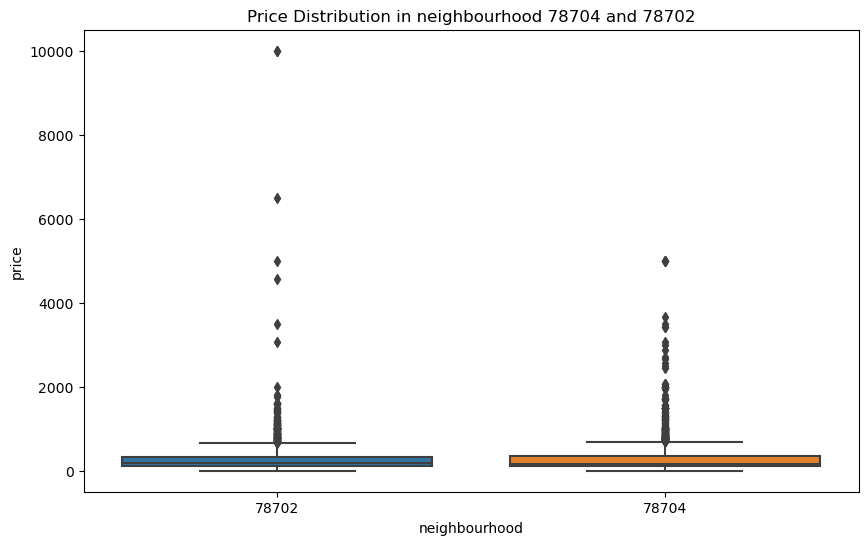

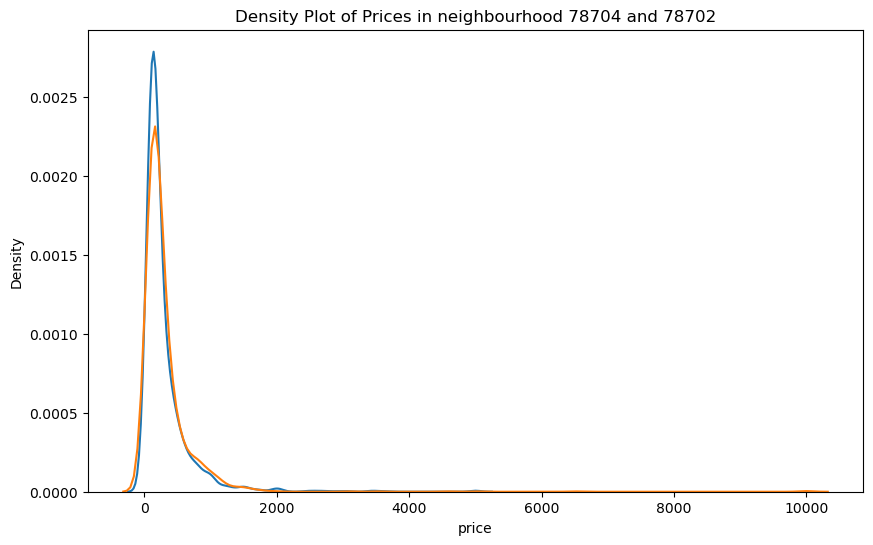

Test Statistic: -0.8239680449613584
P-value: 0.4100159287062213
Fail to reject the null hypothesis: No significant difference in mean prices.


In [5]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare the data
neighbourhood_78704 = airbnb[airbnb['neighbourhood'] == 78704]['price']
neighbourhood_78702 = airbnb[airbnb['neighbourhood'] == 78702]['price']

# Calculate the test statistic
t_stat, p_value = stats.ttest_ind(neighbourhood_78704, neighbourhood_78702, equal_var=False)

# Set the significance level
alpha = 0.05

# Plot box plot and density plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood', y='price', data=airbnb[airbnb['neighbourhood'].isin([78704, 78702])])
plt.title('Price Distribution in neighbourhood 78704 and 78702')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(neighbourhood_78704, label='78704')
sns.kdeplot(neighbourhood_78702, label='78702')
plt.title('Density Plot of Prices in neighbourhood 78704 and 78702')
plt.show()

# Print test results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean prices are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean prices.")
